In [1]:

#Import libraries

In [2]:
!conda install -c conda-forge beautifulsoup4 --yes
!conda install -c conda-forge geopy --yes
!conda install -c conda-forge folium=0.5.0 --yes

print('Library installed.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Library installed.


In [3]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import requests
from pandas.io.json import json_normalize
#from bs4 import BeautifulSoup
import folium

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, normalize, scale
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, jaccard_similarity_score,\
f1_score, log_loss, r2_score

print('Libraries imported.')


Libraries imported.


I. Prepare data.

In [4]:
#First,
#Read .xls files containing salesprice of 5 boroughs and neighborhood information

df1 = pd.read_excel('rollingsales_brooklyn.xls',header=0)
df1.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6363,22,NaN,A9,8645 16TH AVENUE,NaN,...,1,0,1,2058,1492,1930.0,1,A9,0,2019-04-23
1,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6363,48,NaN,A9,12 BAY 13TH STREET,NaN,...,1,0,1,3142,3200,1999.0,1,A9,0,2019-02-27
2,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6363,48,NaN,A9,12 BAY 13TH STREET,NaN,...,1,0,1,3142,3200,1999.0,1,A9,0,2019-02-11
3,Brooklyn,CANARSIE,01 ONE FAMILY DWELLINGS,1,8277,14,NaN,A2,1587 CANARSIE ROAD,NaN,...,1,0,1,2955,760,1901.0,1,A2,200,2019-01-07
4,Brooklyn,BROWNSVILLE,01 ONE FAMILY DWELLINGS,1,3517,25,NaN,A5,73 HERZL STREET,NaN,...,1,0,1,2000,1620,1987.0,1,A5,500,2019-05-23


In [5]:
#Drop columns we don't need
df1 = df1.drop(['TAX CLASS AT PRESENT','EASE-MENT','BUILDING CLASS AT PRESENT','ADDRESS', 'APARTMENT NUMBER', \
                'COMMERCIAL UNITS','TOTAL UNITS','GROSS SQUARE FEET','TAX CLASS AT TIME OF SALE','BUILDING CLASS AT TIME OF SALE',\
                'SALE DATE'],axis=1)


In [6]:
df1['BOROUGH'].unique()

array(['Brooklyn', 'Queens', 'Staten Island', 'Manhattan'], dtype=object)

In [7]:
df1.dtypes

BOROUGH                     object
NEIGHBORHOOD                object
BUILDING CLASS CATEGORY     object
BLOCK                        int64
LOT                          int64
ZIP CODE                   float64
RESIDENTIAL UNITS            int64
LAND SQUARE FEET             int64
YEAR BUILT                 float64
SALE PRICE                   int64
dtype: object

In [8]:
#Filter out irrelevant columns
df1_filtered = df1[(df1['SALE PRICE']>20000) & (df1['LAND SQUARE FEET']>=100) & (df1['YEAR BUILT']>=1890)]

In [9]:
#Get column type information
df1_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22640 entries, 8 to 65196
Data columns (total 10 columns):
BOROUGH                    22640 non-null object
NEIGHBORHOOD               22640 non-null object
BUILDING CLASS CATEGORY    22640 non-null object
BLOCK                      22640 non-null int64
LOT                        22640 non-null int64
ZIP CODE                   22599 non-null float64
RESIDENTIAL UNITS          22640 non-null int64
LAND SQUARE FEET           22640 non-null int64
YEAR BUILT                 22640 non-null float64
SALE PRICE                 22640 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 1.9+ MB


In [10]:
#Do the same for the other datasets

In [11]:
df2 = pd.read_excel('rollingsales_manhattan.xls')
df3 = pd.read_excel('rollingsales_bronx.xls')


In [12]:
df2 = df2.drop(['TAX CLASS AT PRESENT','EASE-MENT','BUILDING CLASS AT PRESENT','ADDRESS', 'APARTMENT NUMBER', \
                'COMMERCIAL UNITS','TOTAL UNITS','GROSS SQUARE FEET','TAX CLASS AT TIME OF SALE','BUILDING CLASS AT TIME OF SALE',\
                'SALE DATE'],axis=1)

In [13]:
df2.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,LAND SQUARE FEET,YEAR BUILT,SALE PRICE
0,Manhattan,MIDTOWN WEST,13 CONDOS - ELEVATOR APARTMENTS,1011,7002,10019.0,0,0,0.0,2443800
1,Manhattan,MIDTOWN WEST,13 CONDOS - ELEVATOR APARTMENTS,1011,7002,10019.0,0,0,0.0,2443800
2,Manhattan,MIDTOWN WEST,13 CONDOS - ELEVATOR APARTMENTS,1011,7014,10019.0,0,0,0.0,2888000
3,Manhattan,MIDTOWN WEST,13 CONDOS - ELEVATOR APARTMENTS,1011,7014,10019.0,0,0,0.0,2888000
4,Manhattan,MIDTOWN WEST,13 CONDOS - ELEVATOR APARTMENTS,1011,7020,10019.0,0,0,0.0,1950000


In [14]:
df3= df3.drop(['TAX CLASS AT PRESENT','EASE-MENT','BUILDING CLASS AT PRESENT','ADDRESS', 'APARTMENT NUMBER', \
                'COMMERCIAL UNITS','TOTAL UNITS','GROSS SQUARE FEET','TAX CLASS AT TIME OF SALE','BUILDING CLASS AT TIME OF SALE',\
                'SALE DATE'],axis=1)

In [15]:
df3.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,LAND SQUARE FEET,YEAR BUILT,SALE PRICE
0,Bronx,BATHGATE,01 ONE FAMILY DWELLINGS,3030,62,10457.0,1,1578,1899.0,455000
1,Bronx,BATHGATE,01 ONE FAMILY DWELLINGS,3030,70,10457.0,1,1694,1899.0,388500
2,Bronx,BATHGATE,01 ONE FAMILY DWELLINGS,3039,63,10458.0,1,1650,1910.0,419000
3,Bronx,BATHGATE,01 ONE FAMILY DWELLINGS,3043,55,10457.0,1,2356,1901.0,470000
4,Bronx,BATHGATE,01 ONE FAMILY DWELLINGS,3046,35,10457.0,1,2050,1899.0,445000


In [16]:
df2_filtered = df2[(df2['SALE PRICE']>20000) & (df2['LAND SQUARE FEET']>=100) & (df2['YEAR BUILT']>=1890)]
df3_filtered = df3[(df3['SALE PRICE']>20000) & (df3['LAND SQUARE FEET']>=100) & (df3['YEAR BUILT']>=1890)]

In [17]:
df2_filtered

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,LAND SQUARE FEET,YEAR BUILT,SALE PRICE
352,Manhattan,HARLEM-CENTRAL,07 RENTALS - WALKUP APARTMENTS,1918,44,10030.0,10,2798,1926.0,9631964
353,Manhattan,HARLEM-CENTRAL,07 RENTALS - WALKUP APARTMENTS,2007,54,10030.0,10,2598,1910.0,9631964
354,Manhattan,HARLEM-CENTRAL,07 RENTALS - WALKUP APARTMENTS,2007,55,10030.0,10,2598,1910.0,9631964
362,Manhattan,HARLEM-CENTRAL,07 RENTALS - WALKUP APARTMENTS,2007,58,10030.0,10,2598,1910.0,9631964
363,Manhattan,HARLEM-CENTRAL,07 RENTALS - WALKUP APARTMENTS,2034,33,10039.0,10,2500,1910.0,9631964
368,Manhattan,HARLEM-CENTRAL,07 RENTALS - WALKUP APARTMENTS,2034,36,10039.0,9,2492,1920.0,9631964
369,Manhattan,HARLEM-CENTRAL,07 RENTALS - WALKUP APARTMENTS,2034,38,10039.0,10,2498,1920.0,9631964
370,Manhattan,HARLEM-CENTRAL,07 RENTALS - WALKUP APARTMENTS,2034,39,10039.0,10,2498,1920.0,9631964
371,Manhattan,HARLEM-CENTRAL,07 RENTALS - WALKUP APARTMENTS,2034,40,10039.0,10,2498,1920.0,9631964
374,Manhattan,UPPER EAST SIDE (79-96),14 RENTALS - 4-10 UNIT,1528,48,10028.0,2,1600,1910.0,9656000


In [18]:
df2_filtered.groupby(['BUILDING CLASS CATEGORY']).size()

BUILDING CLASS CATEGORY
01 ONE FAMILY DWELLINGS                     37
02 TWO FAMILY DWELLINGS                     13
03 THREE FAMILY DWELLINGS                    4
07 RENTALS - WALKUP APARTMENTS              68
08 RENTALS - ELEVATOR APARTMENTS            65
14 RENTALS - 4-10 UNIT                      12
21 OFFICE BUILDINGS                         53
22 STORE BUILDINGS                          20
23 LOFT BUILDINGS                            7
25 LUXURY HOTELS                             9
26 OTHER HOTELS                             14
27 FACTORIES                                 2
29 COMMERCIAL GARAGES                        5
30 WAREHOUSES                                5
31 COMMERCIAL VACANT LAND                    1
32 HOSPITAL AND HEALTH FACILITIES            1
33 EDUCATIONAL FACILITIES                    4
35 INDOOR PUBLIC AND CULTURAL FACILITIES     3
37 RELIGIOUS FACILITIES                      7
dtype: int64

In [19]:
df3_filtered['BUILDING CLASS CATEGORY'].unique()

array(['01 ONE FAMILY DWELLINGS', '02 TWO FAMILY DWELLINGS',
       '03 THREE FAMILY DWELLINGS', '07 RENTALS - WALKUP APARTMENTS',
       '14 RENTALS - 4-10 UNIT', '22 STORE BUILDINGS', '27 FACTORIES',
       '29 COMMERCIAL GARAGES', '30 WAREHOUSES',
       '32 HOSPITAL AND HEALTH FACILITIES', '37 RELIGIOUS FACILITIES',
       '06 TAX CLASS 1 - OTHER', '21 OFFICE BUILDINGS',
       '41 TAX CLASS 4 - OTHER', '08 RENTALS - ELEVATOR APARTMENTS',
       '33 EDUCATIONAL FACILITIES',
       '35 INDOOR PUBLIC AND CULTURAL FACILITIES', '26 OTHER HOTELS',
       '05 TAX CLASS 1 VACANT LAND', '38 ASYLUMS AND HOMES'], dtype=object)

In [32]:
#Combine salesprice data of 5 total boroughs together
df = pd.concat([df1_filtered,df2_filtered,df3_filtered]).reset_index(drop=True)


In [33]:
df['Age'] = 2019-df['YEAR BUILT']
df.drop('YEAR BUILT',axis=1,inplace=True)

In [34]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,LAND SQUARE FEET,SALE PRICE,Age
0,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,6377,32,11214.0,1,3867,1200000,120.0
1,Brooklyn,BATH BEACH,03 THREE FAMILY DWELLINGS,6400,44,11214.0,3,5317,1927000,120.0
2,Brooklyn,CYPRESS HILLS,02 TWO FAMILY DWELLINGS,3910,39,11208.0,2,2000,21000,109.0
3,Brooklyn,BEDFORD STUYVESANT,03 THREE FAMILY DWELLINGS,1640,73,11221.0,3,2000,25000,118.0
4,Brooklyn,BENSONHURST,01 ONE FAMILY DWELLINGS,5573,9,11219.0,1,1830,25000,89.0
5,Brooklyn,BUSHWICK,02 TWO FAMILY DWELLINGS,3388,55,11221.0,2,2000,25000,99.0
6,Brooklyn,FLATBUSH-NORTH,02 TWO FAMILY DWELLINGS,4638,7,11203.0,2,1900,25000,99.0
7,Brooklyn,OCEAN HILL,02 TWO FAMILY DWELLINGS,1444,17,11233.0,2,1314,25000,109.0
8,Brooklyn,OCEAN HILL,02 TWO FAMILY DWELLINGS,1444,17,11233.0,2,1314,25000,109.0
9,Brooklyn,OLD MILL BASIN,01 ONE FAMILY DWELLINGS,8408,5,11234.0,1,1920,25000,89.0


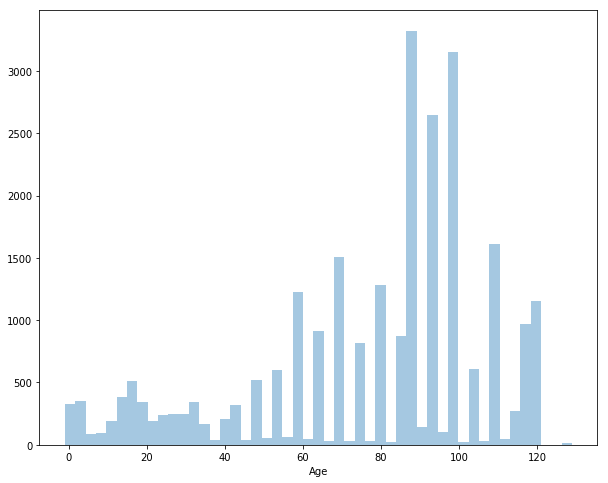

In [36]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.distplot(df['Age'], kde=False)

In [37]:
df = df[(df['Age']>=0) & (df['Age']<=125)]

In [38]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,LAND SQUARE FEET,SALE PRICE,Age
0,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,6377,32,11214.0,1,3867,1200000,120.0
1,Brooklyn,BATH BEACH,03 THREE FAMILY DWELLINGS,6400,44,11214.0,3,5317,1927000,120.0
2,Brooklyn,CYPRESS HILLS,02 TWO FAMILY DWELLINGS,3910,39,11208.0,2,2000,21000,109.0
3,Brooklyn,BEDFORD STUYVESANT,03 THREE FAMILY DWELLINGS,1640,73,11221.0,3,2000,25000,118.0
4,Brooklyn,BENSONHURST,01 ONE FAMILY DWELLINGS,5573,9,11219.0,1,1830,25000,89.0
5,Brooklyn,BUSHWICK,02 TWO FAMILY DWELLINGS,3388,55,11221.0,2,2000,25000,99.0
6,Brooklyn,FLATBUSH-NORTH,02 TWO FAMILY DWELLINGS,4638,7,11203.0,2,1900,25000,99.0
7,Brooklyn,OCEAN HILL,02 TWO FAMILY DWELLINGS,1444,17,11233.0,2,1314,25000,109.0
8,Brooklyn,OCEAN HILL,02 TWO FAMILY DWELLINGS,1444,17,11233.0,2,1314,25000,109.0
9,Brooklyn,OLD MILL BASIN,01 ONE FAMILY DWELLINGS,8408,5,11234.0,1,1920,25000,89.0


In [39]:
df['BUILDING CLASS CATEGORY'].unique()

array(['01 ONE FAMILY DWELLINGS', '03 THREE FAMILY DWELLINGS',
       '02 TWO FAMILY DWELLINGS', '07 RENTALS - WALKUP APARTMENTS',
       '22 STORE BUILDINGS', '08 RENTALS - ELEVATOR APARTMENTS',
       '06 TAX CLASS 1 - OTHER', '14 RENTALS - 4-10 UNIT',
       '29 COMMERCIAL GARAGES', '30 WAREHOUSES',
       '32 HOSPITAL AND HEALTH FACILITIES', '37 RELIGIOUS FACILITIES',
       '21 OFFICE BUILDINGS', '27 FACTORIES',
       '35 INDOOR PUBLIC AND CULTURAL FACILITIES',
       '41 TAX CLASS 4 - OTHER', '33 EDUCATIONAL FACILITIES',
       '38 ASYLUMS AND HOMES', '34 THEATRES', '23 LOFT BUILDINGS',
       '26 OTHER HOTELS', '31 COMMERCIAL VACANT LAND',
       '05 TAX CLASS 1 VACANT LAND', '36 OUTDOOR RECREATIONAL FACILITIES',
       '25 LUXURY HOTELS'], dtype=object)

In [40]:
df.groupby('BUILDING CLASS CATEGORY').size()

BUILDING CLASS CATEGORY
01 ONE FAMILY DWELLINGS                     11795
02 TWO FAMILY DWELLINGS                      8876
03 THREE FAMILY DWELLINGS                    2202
05 TAX CLASS 1 VACANT LAND                     58
06 TAX CLASS 1 - OTHER                         73
07 RENTALS - WALKUP APARTMENTS               1457
08 RENTALS - ELEVATOR APARTMENTS              219
14 RENTALS - 4-10 UNIT                        298
21 OFFICE BUILDINGS                           229
22 STORE BUILDINGS                            527
23 LOFT BUILDINGS                              15
25 LUXURY HOTELS                               12
26 OTHER HOTELS                                29
27 FACTORIES                                  115
29 COMMERCIAL GARAGES                         150
30 WAREHOUSES                                 189
31 COMMERCIAL VACANT LAND                       2
32 HOSPITAL AND HEALTH FACILITIES              23
33 EDUCATIONAL FACILITIES                      26
34 THEATRES               

In [41]:
#We only focus on the sales of residential peoperty, see NYC definations of classcode for reference:
#https://www.cookcountyassessor.com/assets/forms/classcode.pdf
df = df[df['BUILDING CLASS CATEGORY'].isin(['01 ONE FAMILY DWELLINGS','02 TWO FAMILY DWELLINGS','03 THREE FAMILY DWELLINGS'])]


In [42]:
df.reset_index(drop=True)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,LAND SQUARE FEET,SALE PRICE,Age
0,Brooklyn,BATH BEACH,01 ONE FAMILY DWELLINGS,6377,32,11214.0,1,3867,1200000,120.0
1,Brooklyn,BATH BEACH,03 THREE FAMILY DWELLINGS,6400,44,11214.0,3,5317,1927000,120.0
2,Brooklyn,CYPRESS HILLS,02 TWO FAMILY DWELLINGS,3910,39,11208.0,2,2000,21000,109.0
3,Brooklyn,BEDFORD STUYVESANT,03 THREE FAMILY DWELLINGS,1640,73,11221.0,3,2000,25000,118.0
4,Brooklyn,BENSONHURST,01 ONE FAMILY DWELLINGS,5573,9,11219.0,1,1830,25000,89.0
5,Brooklyn,BUSHWICK,02 TWO FAMILY DWELLINGS,3388,55,11221.0,2,2000,25000,99.0
6,Brooklyn,FLATBUSH-NORTH,02 TWO FAMILY DWELLINGS,4638,7,11203.0,2,1900,25000,99.0
7,Brooklyn,OCEAN HILL,02 TWO FAMILY DWELLINGS,1444,17,11233.0,2,1314,25000,109.0
8,Brooklyn,OCEAN HILL,02 TWO FAMILY DWELLINGS,1444,17,11233.0,2,1314,25000,109.0
9,Brooklyn,OLD MILL BASIN,01 ONE FAMILY DWELLINGS,8408,5,11234.0,1,1920,25000,89.0


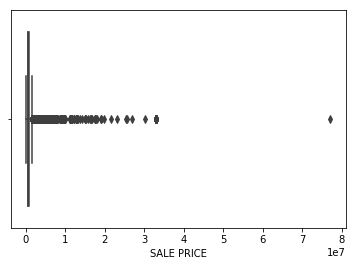

In [43]:
#Filter out outliers
import seaborn as sns
sns.boxplot(df['SALE PRICE'])

In [44]:
df['SALE PRICE'].sort_values(ascending=False)

22915    77100000
17565    33000000
17585    33000000
17593    33000000
17592    33000000
17591    33000000
17590    33000000
17589    33000000
17564    33000000
17577    33000000
17588    33000000
17566    33000000
17567    33000000
17587    33000000
17568    33000000
17586    33000000
17594    33000000
17584    33000000
17579    33000000
17583    33000000
17574    33000000
17575    33000000
17573    33000000
17578    33000000
17576    33000000
17572    33000000
17581    33000000
17571    33000000
17582    33000000
17570    33000000
           ...   
14          30000
7468        30000
7467        30000
7466        30000
7465        30000
523         30000
23457       30000
7464        30000
7463        30000
522         30000
13          29800
19033       28000
12          28000
7460        27600
7459        27500
10          26800
7457        25000
7456        25000
19859       25000
9           25000
8           25000
7           25000
6           25000
5           25000
4         

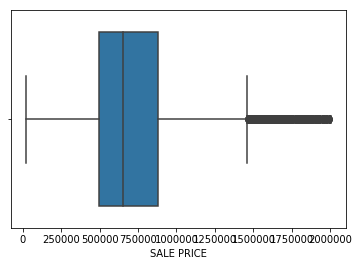

In [45]:
#Check salesprice
df = df[df['SALE PRICE']<2000000]
sns.boxplot(df['SALE PRICE'])

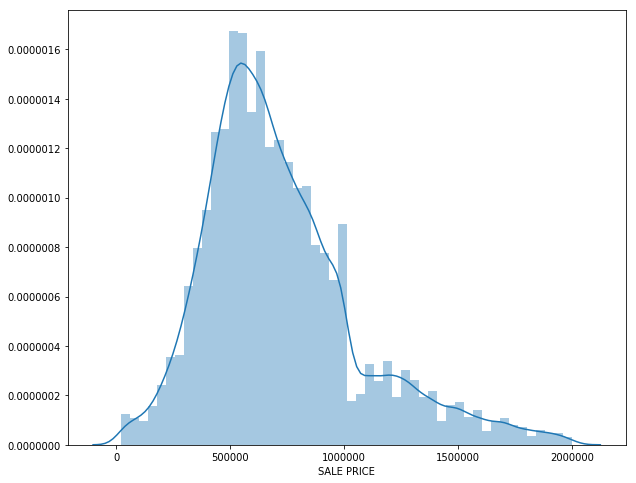

In [46]:
plt.figure(figsize=(10,8))
sns.distplot(df['SALE PRICE'])

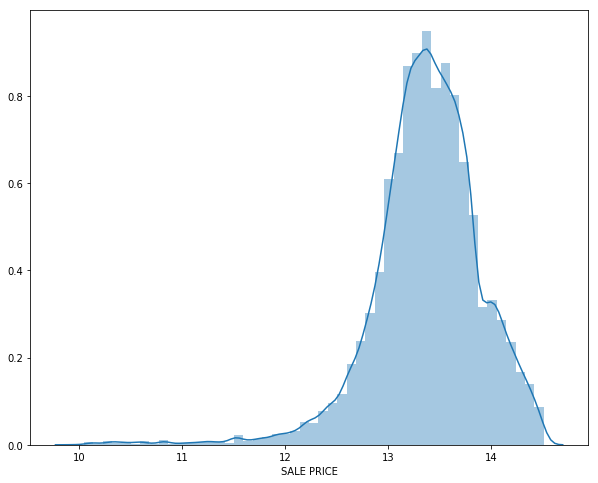

In [47]:
plt.figure(figsize=(10,8))
sns.distplot(np.log(df['SALE PRICE']))

We can see that the x-axis has changed, so the removal of outliers works.

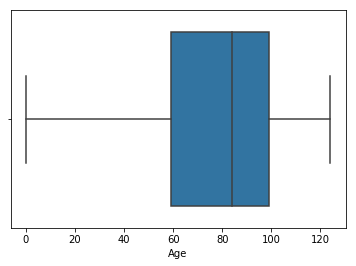

In [48]:
#Check year-built
sns.boxplot(df['Age'])

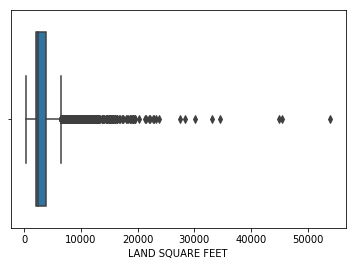

In [49]:
#Check land square feet
sns.boxplot(df['LAND SQUARE FEET'])

In [50]:
df=df[df['LAND SQUARE FEET']<20000]

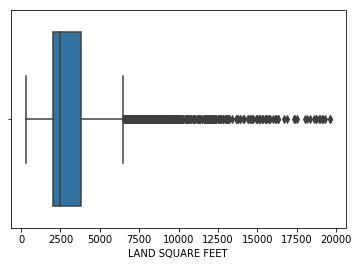

In [51]:
sns.boxplot(df['LAND SQUARE FEET'])

In [52]:
df = df.drop_duplicates().reset_index(drop=True)

In [53]:
df_pic = df.copy()
df_pic.drop(['BLOCK','LOT','ZIP CODE'],axis=1, inplace=True)

In [54]:
df_pic.groupby('BUILDING CLASS CATEGORY').agg([np.mean, np.std])

RESIDENTIAL UNITS           LAND SQUARE FEET  \
                                       mean       std             mean   
BUILDING CLASS CATEGORY                                                  
01 ONE FAMILY DWELLINGS            1.001668  0.046826      3175.391289   
02 TWO FAMILY DWELLINGS            1.999278  0.034684      2887.087726   
03 THREE FAMILY DWELLINGS          2.998975  0.045279      2589.305997   

                                           SALE PRICE                 \
                                   std           mean            std   
BUILDING CLASS CATEGORY                                                
01 ONE FAMILY DWELLINGS    1811.270005  634407.550492  293142.718509   
02 TWO FAMILY DWELLINGS    1414.198040  783029.794585  345627.621839   
03 THREE FAMILY DWELLINGS  1216.236530  948276.266017  407103.674487   

                                 Age             
                                mean        std  
BUILDING CLASS CATEGORY                          
01 ONE FAMILY DWELLINGS    74.082192  27.374695  
02 TWO FAMILY DWELLINGS    77.730205  32.382182  
03 THREE FAMILY DWELLINGS  79.544849  35.596959

In [55]:
#Second, 
#we need to get neighborhood coordinates from json file.

In [56]:
!wget -q -O 'nyc_geo.json' https://ibm.box.com/shared/static/fbpwbovar7lf8p5sgddm06cgipa2rxpe.json
print('Data downloaded!')

Data downloaded!


In [57]:
with open('nyc_geo.json') as nyc_geo_json:
    nyc_geo_data = json.load(nyc_geo_json)

In [58]:
nyc_geo_list = nyc_geo_data['features']
nyc_geo_list[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [59]:
#Parse the json data into lists
neighborhood_geo_list = []
for data in nyc_geo_list:
    borough = data['properties']['borough']
    neighborhood = data['properties']['name']
    lat = data['geometry']['coordinates'][1]
    lng = data['geometry']['coordinates'][0]
    neighborhood_geo_list.append((borough,neighborhood,lat,lng))


In [60]:
neighborhood_geo_df = pd.DataFrame(neighborhood_geo_list)
neighborhood_geo_df.columns = ['Borough','Neighborhood','Latitude','Longitude']


In [61]:
neighborhood_geo_df.shape

(306, 4)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21649 entries, 0 to 21648
Data columns (total 10 columns):
BOROUGH                    21649 non-null object
NEIGHBORHOOD               21649 non-null object
BUILDING CLASS CATEGORY    21649 non-null object
BLOCK                      21649 non-null int64
LOT                        21649 non-null int64
ZIP CODE                   21645 non-null float64
RESIDENTIAL UNITS          21649 non-null int64
LAND SQUARE FEET           21649 non-null int64
SALE PRICE                 21649 non-null int64
Age                        21649 non-null float64
dtypes: float64(2), int64(5), object(3)
memory usage: 1.7+ MB


In [63]:
#Modify data structures
N = df['NEIGHBORHOOD'].values.tolist()
N = [i.title() for i in N]
df['NEIGHBORHOOD'] = N
df.reset_index(drop=True)
df.to_excel('Salesprice.xlsx')

In [64]:
neighborhood_geo_df.head(20)

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [65]:
neighborhood_geo_df.to_excel('neighborhood_geo_df.xlsx')

In [66]:
neighborhood_geo_df.groupby('Borough')['Neighborhood'].first()

Borough
Bronx              Wakefield
Brooklyn           Bay Ridge
Manhattan        Marble Hill
Queens               Astoria
Staten Island     St. George
Name: Neighborhood, dtype: object

In [67]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,LAND SQUARE FEET,SALE PRICE,Age
0,Brooklyn,Bath Beach,01 ONE FAMILY DWELLINGS,6377,32,11214.0,1,3867,1200000,120.0
1,Brooklyn,Bath Beach,03 THREE FAMILY DWELLINGS,6400,44,11214.0,3,5317,1927000,120.0
2,Brooklyn,Cypress Hills,02 TWO FAMILY DWELLINGS,3910,39,11208.0,2,2000,21000,109.0
3,Brooklyn,Bedford Stuyvesant,03 THREE FAMILY DWELLINGS,1640,73,11221.0,3,2000,25000,118.0
4,Brooklyn,Bensonhurst,01 ONE FAMILY DWELLINGS,5573,9,11219.0,1,1830,25000,89.0
5,Brooklyn,Bushwick,02 TWO FAMILY DWELLINGS,3388,55,11221.0,2,2000,25000,99.0
6,Brooklyn,Flatbush-North,02 TWO FAMILY DWELLINGS,4638,7,11203.0,2,1900,25000,99.0
7,Brooklyn,Ocean Hill,02 TWO FAMILY DWELLINGS,1444,17,11233.0,2,1314,25000,109.0
8,Brooklyn,Old Mill Basin,01 ONE FAMILY DWELLINGS,8408,5,11234.0,1,1920,25000,89.0
9,Brooklyn,Sheepshead Bay,02 TWO FAMILY DWELLINGS,7396,39,11235.0,2,2340,26800,59.0


In [68]:
df.columns = ['Borough','Neighborhood','Building Class Category','Block',\
             'Lot','Zip Code','Residential Units','Land Square Feet',\
             'Sale Price','Age']

In [69]:
df

,Borough,Neighborhood,Building Class Category,Block,Lot,Zip Code,Residential Units,Land Square Feet,Sale Price,Age
0,Brooklyn,Bath Beach,01 ONE FAMILY DWELLINGS,6377,32,11214.0,1,3867,1200000,120.0
1,Brooklyn,Bath Beach,03 THREE FAMILY DWELLINGS,6400,44,11214.0,3,5317,1927000,120.0
2,Brooklyn,Cypress Hills,02 TWO FAMILY DWELLINGS,3910,39,11208.0,2,2000,21000,109.0
3,Brooklyn,Bedford Stuyvesant,03 THREE FAMILY DWELLINGS,1640,73,11221.0,3,2000,25000,118.0
4,Brooklyn,Bensonhurst,01 ONE FAMILY DWELLINGS,5573,9,11219.0,1,1830,25000,89.0
5,Brooklyn,Bushwick,02 TWO FAMILY DWELLINGS,3388,55,11221.0,2,2000,25000,99.0
6,Brooklyn,Flatbush-North,02 TWO FAMILY DWELLINGS,4638,7,11203.0,2,1900,25000,99.0
7,Brooklyn,Ocean Hill,02 TWO FAMILY DWELLINGS,1444,17,11233.0,2,1314,25000,109.0
8,Brooklyn,Old Mill Basin,01 ONE FAMILY DWELLINGS,8408,5,11234.0,1,1920,25000,89.0
9,Brooklyn,Sheepshead Bay,02 TWO FAMILY DWELLINGS,7396,39,11235.0,2,2340,26800,59.0


In [70]:
#Then, 
#Clean data: some neighborhood names in the salesprice dataset don't match\
#those in the json file.
df.replace(to_replace = 'Airport La Guardia', value='LaGuardia Airport',inplace=True)
df.replace(to_replace='Arrochar-Shore Acres', value='Arrochar',inplace=True)
df.replace(to_replace='Bedford Park/Norwood', value='Bedford Park',inplace=True)
df.replace(to_replace='Castle Hill/Unionport', value='Castle Hill',inplace=True)
df.replace(to_replace='Cobble Hill-West', value='Cobble Hill',inplace=True)
df.replace(to_replace='Concord-Fox Hills',value='Concord',inplace=True)
df.replace(to_replace=['Dongan Hills-Colony','Dongan Hills-Old Town'],value='Dongan Hills',inplace=True)
df.replace(to_replace=['Downtown-Fulton Ferry','Downtown-Fulton Mall','Downtown-Metrotech'], value='Downtown',inplace=True)
df.replace(to_replace='Financial', value = 'Financial District',inplace=True)
df.replace(to_replace=['Flatbush-Central'],value=['Flatbush'],inplace=True)
df.replace(to_replace=['Flatbush-East'],value='Flatbuch East',inplace=True)
df.replace(to_replace=['Flatbush-Lefferts Garden'],value='Flatbush',inplace=True)
df.replace(to_replace=['Flatbush-North'],value=['Flatbush North'],inplace=True)
df.replace(to_replace=['Flushing Meadow Park','Flushing-North'],value='Flushing',inplace=True)
df.replace(to_replace=['Flushing-South'],value=['Flushing South'],inplace=True)
df.replace(to_replace=['Great Kills-Bay Terrace'],value=['Green Kills'],inplace=True)
df.replace(to_replace=['Greenwich Village-Central','Greenwich Village-West'],value='Greenwich Village',inplace=True)
df.replace(to_replace=['Harlem-Central'],value=['Harlem Central'],inplace=True)
df.replace(to_replace=['Harlem-East'],value=['Harlem East'],inplace=True)
df.replace(to_replace=['Harlem-Upper'],value=['Harlem Upper'],inplace=True)
df.replace(to_replace=['Harlem-West'],value=['Harlem West'],inplace=True)
df.replace(to_replace=['Highbridge/Morris Heights'],value='High Bridge',inplace=True)
df.replace(to_replace=['Kingsbridge Hts/Univ Hts'],value=['Kingsbridge Heights'],inplace=True)
df.replace(to_replace=['Kingsbridge/Jerome Park'],value=['Kingsbridge'],inplace=True)
df.replace(to_replace=['Mariners Harbor'],value=["Mariner's Harbor"],inplace=True)
df.replace(to_replace=['Melrose/Concourse'],value=['Melrose'],inplace=True)
df.replace(to_replace=['Midtown Cbd'],value=['Midtown'],inplace=True)
df.replace(to_replace=['Morris Park/Van Nest'],value=['Morris Park'],inplace=True)
df.replace(to_replace=['Morrisania/Longwood'],value=['Morrisania'],inplace=True)
df.replace(to_replace=['Mott Haven/Port Morris'],value=['Mott Haven'],inplace=True)
df.replace(to_replace=['Mott Haven/Mount Eden'],value=['Mount Hope'],inplace=True)
df.replace(to_replace=['New Brighton-St. George'],value=['New Brighton'],inplace=True)
df.replace(to_replace=['New Dorp-Beach'],value=['New Dorp Beach'],inplace=True)
df.replace(to_replace=['New Dorp-Heights'],value=['New Dorp Heights'],inplace=True)
df.replace(to_replace=['Oakwood-Beach'],value=['Oakwood'],inplace=True)
df.replace(to_replace=['Ocean Parkway-North','Ocean Parkway-South'],value='Ocean Parkway',inplace=True)
df.replace(to_replace=['Old Mill Basin'],value=['Mill Basin'],inplace=True)
df.replace(to_replace=['Park Slope South'],value=['Park Slope'],inplace=True)
df.replace(to_replace=['Pelham Parkway North'],value=['Pelham Parkway'],inplace=True)
df.replace(to_replace=['Princes Bay'],value=["Prince's Bay"],inplace=True)
df.replace(to_replace=['Richmondtown','Richmondtown-Lighths Hill'],value='Richmond Town',inplace=True)
df.replace(to_replace=['Rossville-Charleston'],value=['Charleston'],inplace=True)
df.replace(to_replace=['Rossville-Richmond Valley'],value=['Richmond Valley'],inplace=True)
df.replace(to_replace=['Schuylerville/Pelham Bay'],value=['Schuylerville'],inplace=True)
df.replace(to_replace=['Seagate'],value=['Sea Gate'],inplace=True)
df.replace(to_replace=['So. Jamaica-Baisley Park'],value=['Baisley Park'],inplace=True)
df.replace(to_replace=['Southbridge'],value=['Southbridge Towers'],inplace=True)
df.replace(to_replace=['Stapleton-Clifton'],value=['Stapleton'],inplace=True)
df.replace(to_replace=['Upper East Side (59-79)','Upper East Side (79-96)'],value='Upper East Side',inplace=True)
df.replace(to_replace=['Upper West Side (59-79)','Upper West Side (79-96)','Upper West Side (96-116)'],\
           value='Upper West Side',inplace=True)
df.replace(to_replace=['Washington Heights Lower','Washington Heights Upper'],value='Washington Heights',inplace=True)
df.replace(to_replace=['West New Brighton'],value=['West Brighton'],inplace=True)
df.replace(to_replace=['Westchester'],value=['Westchester Square'],inplace=True)
df.replace(to_replace=['Williamsburg-Central','Williamsburg-East','Williamsburg-North'],value='Williamsburg',inplace=True)


In [896]:
#Have appended missing value to neighborhood_geo_df file
neighborhood_geo_df = pd.read_excel('neighborhood_geo_df.xlsx')


In [897]:
df

,Borough,Neighborhood,Building Class Category,Residential Units,Land Square Feet,Sale Price,Age
0,Brooklyn,Bath Beach,01 ONE FAMILY DWELLINGS,1,3867,1200000,120.0
1,Brooklyn,Bath Beach,03 THREE FAMILY DWELLINGS,3,5317,1927000,120.0
2,Brooklyn,Cypress Hills,02 TWO FAMILY DWELLINGS,2,2000,21000,109.0
3,Brooklyn,Bedford Stuyvesant,03 THREE FAMILY DWELLINGS,3,2000,25000,118.0
4,Brooklyn,Bensonhurst,01 ONE FAMILY DWELLINGS,1,1830,25000,89.0
5,Brooklyn,Bushwick,02 TWO FAMILY DWELLINGS,2,2000,25000,99.0
6,Brooklyn,Flatbush North,02 TWO FAMILY DWELLINGS,2,1900,25000,99.0
7,Brooklyn,Ocean Hill,02 TWO FAMILY DWELLINGS,2,1314,25000,109.0
8,Brooklyn,Mill Basin,01 ONE FAMILY DWELLINGS,1,1920,25000,89.0
9,Brooklyn,Sheepshead Bay,02 TWO FAMILY DWELLINGS,2,2340,26800,59.0


In [72]:
df.drop(['Block','Lot','Zip Code'],inplace=True,axis=1)

In [73]:
neighborhood_geo_df.drop('Unnamed: 0',axis=1,inplace=True)

In [74]:
nyc_df = pd.merge(df,neighborhood_geo_df,on=['Neighborhood','Borough'])


In [75]:
nyc_df

,Borough,Neighborhood,Building Class Category,Residential Units,Land Square Feet,Sale Price,Age,Latitude,Longitude
0,Brooklyn,Bath Beach,01 ONE FAMILY DWELLINGS,1,3867,1200000,120.0,40.599519,-73.998752
1,Brooklyn,Bath Beach,03 THREE FAMILY DWELLINGS,3,5317,1927000,120.0,40.599519,-73.998752
2,Brooklyn,Bath Beach,02 TWO FAMILY DWELLINGS,2,2248,110000,89.0,40.599519,-73.998752
3,Brooklyn,Bath Beach,02 TWO FAMILY DWELLINGS,2,1767,200000,89.0,40.599519,-73.998752
4,Brooklyn,Bath Beach,02 TWO FAMILY DWELLINGS,2,2248,310000,89.0,40.599519,-73.998752
5,Brooklyn,Bath Beach,02 TWO FAMILY DWELLINGS,2,1600,500000,79.0,40.599519,-73.998752
6,Brooklyn,Bath Beach,02 TWO FAMILY DWELLINGS,2,2320,637500,89.0,40.599519,-73.998752
7,Brooklyn,Bath Beach,01 ONE FAMILY DWELLINGS,1,1649,680000,79.0,40.599519,-73.998752
8,Brooklyn,Bath Beach,01 ONE FAMILY DWELLINGS,1,1619,680000,79.0,40.599519,-73.998752
9,Brooklyn,Bath Beach,02 TWO FAMILY DWELLINGS,2,1247,700000,94.0,40.599519,-73.998752


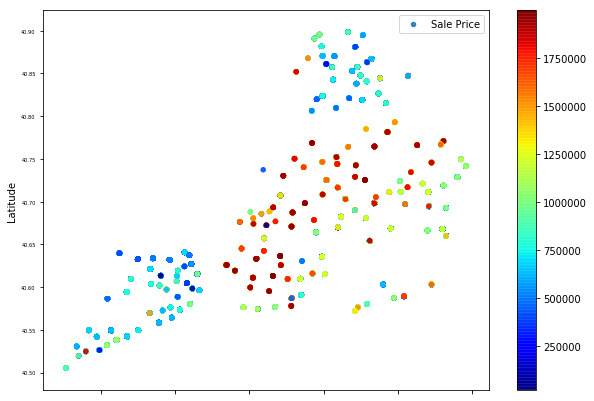

In [898]:
#Geographic visualization on the map
nyc_df.plot(kind='scatter',x='Longitude',y='Latitude',alpha=0.9,fontsize=5,figsize=(10,7),
           c=nyc_df['Sale Price'],label='Sale Price',cmap=plt.get_cmap('jet'),\
           colorbar=True)
plt.legend()


from folium import plugins
from folium.plugins import HeatMap

nyc_polygon_geo_data = r'nyc_geo.json'
latitude = 40.8021285
longitude = -73.9777254

nyc_heatmap = folium.Map(location=[latitude, longitude], zoom_start=11)

lat = np.array(nyc_df['Latitude'])
lng = np.array(nyc_df['Longitude'])
pop = np.array(nyc_df['Sale Price'])
data1 = [[lat[i], lng[i], pop[i]] for i in range(len(nyc_df))]

HeatMap(data1).add_to(nyc_heatmap)


nyc_heatmap

In [77]:
nyc_polygon_geo_data = r'nyc_geo.json'
latitude = 40.8021285
longitude = -73.9777254

In [78]:
#Visualize on map

#First, create a plain map
nyc_map_markers = folium.Map(location=[latitude, longitude], zoom_start=11)

#Generate choropleth map
nyc_map_markers.choropleth(
    geo_data = nyc_polygon_geo_data,
    data = nyc_df,
    columns = ['Neighborhood', 'Sale Price'],
    key_on = 'feature.properties.neighborhood',
    fill_color = 'YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name = 'Sale prices in NY City')


nyc_map_markers    

III. Prepare census_tract characteristic data
Data source: Neighborhood Tabulation Areas (NTAs) Level by NYC City Planning
Map user guide: https://www1.nyc.gov/assets/planning/download/pdf/data-maps/maps-geography/census-factfinder/cff-userguide.pdf

In [267]:
blocks = pd.read_csv('census_block_loc.csv')
census = pd.read_csv('acs2017_census_tract_data.csv',index_col=0)

In [268]:
blocks

,Latitude,Longitude,BlockCode,County,State
0,40.48,-74.280000,340230076002012,Middlesex,NJ
1,40.48,-74.276834,340230076005000,Middlesex,NJ
2,40.48,-74.273668,340230076003018,Middlesex,NJ
3,40.48,-74.270503,340230076003004,Middlesex,NJ
4,40.48,-74.267337,340230074021000,Middlesex,NJ
5,40.48,-74.264171,340230074021000,Middlesex,NJ
6,40.48,-74.261005,340230074021000,Middlesex,NJ
7,40.48,-74.257839,340230074021000,Middlesex,NJ
8,40.48,-74.254673,340230074025000,Middlesex,NJ
9,40.48,-74.251508,340230074025000,Middlesex,NJ


In [269]:
blocks = blocks[blocks['County'].isin(['Bronx','King','New York','Queens','Richmond'])]
blocks['Tract'] = blocks['BlockCode'] //10000
blocks = blocks.merge(census, how='left', right_index = True, left_on = 'Tract')

blocks.drop_duplicates().reset_index(drop=True)


/Users/sfdatabro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Latitude,Longitude,BlockCode,County_x,State_x,Tract,State_y,County_y,TotalPop,Men,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,40.480000,-74.232513,360859901000011,Richmond,NY,36085990100,New York,Richmond County,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,40.480000,-74.229347,360859901000011,Richmond,NY,36085990100,New York,Richmond County,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,40.480000,-74.226181,360859901000011,Richmond,NY,36085990100,New York,Richmond County,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,40.480000,-74.223015,360859901000011,Richmond,NY,36085990100,New York,Richmond County,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,40.480000,-74.219849,360859901000011,Richmond,NY,36085990100,New York,Richmond County,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
5,40.480000,-74.216683,360859901000010,Richmond,NY,36085990100,New York,Richmond County,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
6,40.480000,-74.213518,360859901000010,Richmond,NY,36085990100,New York,Richmond County,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
7,40.482261,-74.238844,360859901000012,Richmond,NY,36085990100,New York,Richmond County,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
8,40.482261,-74.235678,360859901000011,Richmond,NY,36085990100,New York,Richmond County,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
9,40.482261,-74.232513,360859901000011,Richmond,NY,36085990100,New York,Richmond County,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [270]:

blocks['Income'] = pd.to_numeric(blocks['Income'], errors = 'coerce')
blocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14324 entries, 15 to 37111
Data columns (total 42 columns):
Latitude            14324 non-null float64
Longitude           14324 non-null float64
BlockCode           14324 non-null int64
County_x            14324 non-null object
State_x             14324 non-null object
Tract               14324 non-null int64
State_y             14323 non-null object
County_y            14323 non-null object
TotalPop            14323 non-null float64
Men                 14323 non-null float64
Women               14323 non-null float64
Hispanic            10078 non-null float64
White               10078 non-null float64
Black               10078 non-null float64
Native              10078 non-null float64
Asian               10078 non-null float64
Pacific             10078 non-null float64
VotingAgeCitizen    14323 non-null float64
Income              9475 non-null float64
IncomeErr           9475 non-null float64
IncomePerCap        9738 non-null float6

Visualize on map

In [271]:
#Convert to 2D array
def convert_to_2d(lats,lons,values):
    latmin = 40.48
    lonmin = -74.28
    latmax = 40.93
    lonmax = -73.65
    lon_vals = np.mgrid[lonmin:lonmax:200j]
    lat_vals = np.mgrid[latmin:latmax:200j]
    map_values = np.zeros([200,200])
    dlat = lat_vals[1] - lat_vals[0]
    dlon = lon_vals[1] - lon_vals[0]
    for lat,lon,value in zip(lats,lons,values):
        lat_idx = int(np.rint((lat - latmin) / dlat))
        lon_idx = int(np.rint((lon-lonmin) / dlon ))        
        if not np.isnan(value):
            map_values[lon_idx,lat_idx] = value
    return lat_vals,lon_vals,map_values

In [272]:
#Wrote a function aimed to visualize our observations via making plots 
def make_plot(data_values, title='', colors='Greens'):
    lat_vals, lng_vals, values = convert_to_2d(blocks['Latitude'], blocks\
                                              ['Longitude'],data_values)
    fig = plt.figure(1, figsize=[10,10])
    limits = np.min(lng_vals), np.max(lng_vals), np.min(lat_vals), np.max(lat_vals)
    im = plt.imshow(values.T, origin='lower', cmap=colors, extent=limits)
    plt.xlabel('Longitude [degrees]')
    plt.ylabel('Latitude [degrees]')
    plt.title(title)
    plt.colorbar(im, fraction=0.035, pad=0.04)
    plt.show()



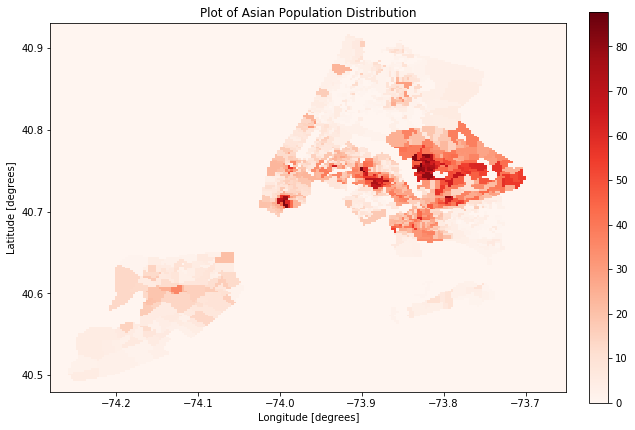

In [273]:
#Plot of Asian Population Distribution
make_plot(blocks['Asian'], colors='Reds', title='Plot of Asian Population Distribution')




Plot Income in New York City

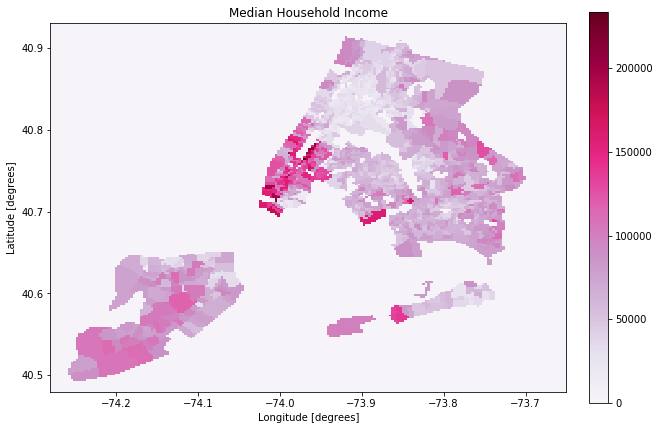

In [274]:
#Plot of median household income
make_plot(blocks['Income'], colors = 'PuRd', title='Median Household Income')


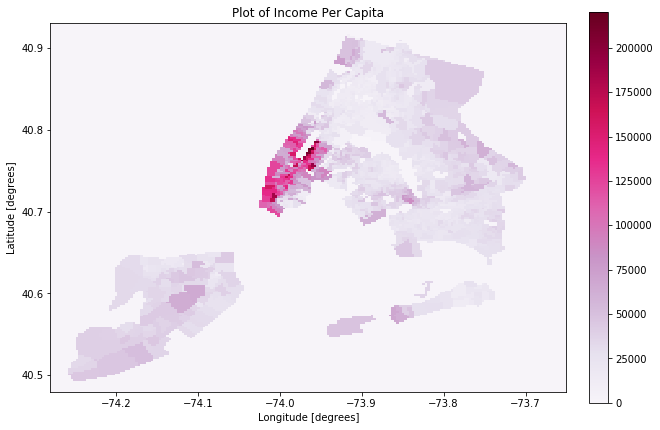

In [275]:
#Plot of Income Per Capita to see changes
make_plot(blocks['IncomePerCap'], colors='PuRd', title='Plot of Income Per Capita')


In [88]:
#Observation:
#According to the map, we could see that Manhattan East 96th Street is 
#generally the wealthiest. Comparing the two plots we can also tell that
#Manhattan have fewer people per household than other boroughs.

#Maybe count this part as 'further analysis'?

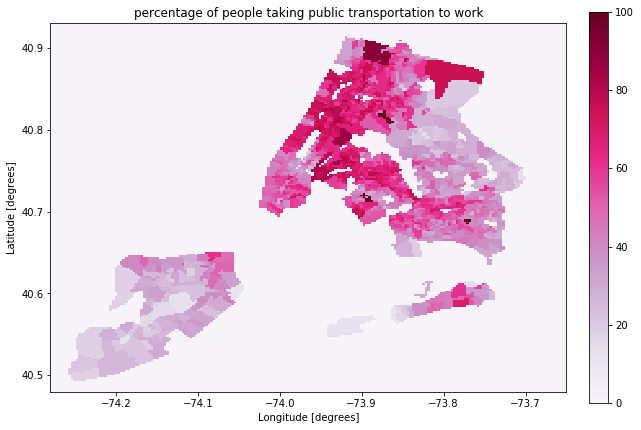

In [276]:
#Plot percentage of people taking public transportation to work
make_plot(blocks['Transit'], colors='PuRd', title='percentage of people \
taking public transportation to work')


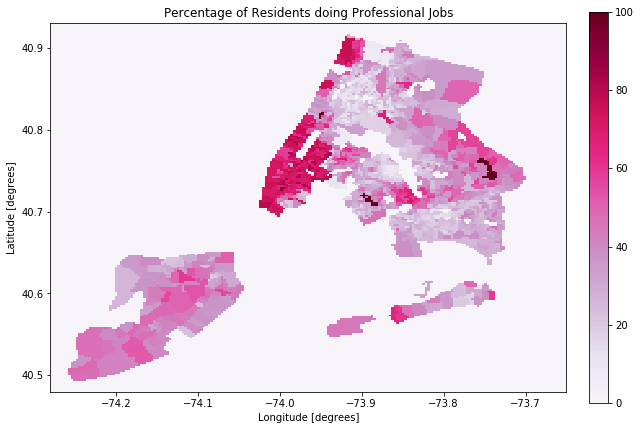

In [277]:
#Plot what jobs are residents up to
make_plot(blocks['Professional'], colors='PuRd', title='Percentage of \
Residents doing Professional Jobs')


In [91]:
#Observation: This precisely implies that a huge amount of residents in 
#Manhattan are occupied with professional jobs which generally require 
#higher education and people in return get higher salaries. This observation
#greatly echoes what we find in Sale Price.
#把两张图放在一起比较说明？

IV. Using FourSquare API to get surrounding venues

In [93]:
nyc_df

,Borough,Neighborhood,Building Class Category,Residential Units,Land Square Feet,Sale Price,Age,Latitude,Longitude
0,Brooklyn,Bath Beach,01 ONE FAMILY DWELLINGS,1,3867,1200000,120.0,40.599519,-73.998752
1,Brooklyn,Bath Beach,03 THREE FAMILY DWELLINGS,3,5317,1927000,120.0,40.599519,-73.998752
2,Brooklyn,Bath Beach,02 TWO FAMILY DWELLINGS,2,2248,110000,89.0,40.599519,-73.998752
3,Brooklyn,Bath Beach,02 TWO FAMILY DWELLINGS,2,1767,200000,89.0,40.599519,-73.998752
4,Brooklyn,Bath Beach,02 TWO FAMILY DWELLINGS,2,2248,310000,89.0,40.599519,-73.998752
5,Brooklyn,Bath Beach,02 TWO FAMILY DWELLINGS,2,1600,500000,79.0,40.599519,-73.998752
6,Brooklyn,Bath Beach,02 TWO FAMILY DWELLINGS,2,2320,637500,89.0,40.599519,-73.998752
7,Brooklyn,Bath Beach,01 ONE FAMILY DWELLINGS,1,1649,680000,79.0,40.599519,-73.998752
8,Brooklyn,Bath Beach,01 ONE FAMILY DWELLINGS,1,1619,680000,79.0,40.599519,-73.998752
9,Brooklyn,Bath Beach,02 TWO FAMILY DWELLINGS,2,1247,700000,94.0,40.599519,-73.998752


In [102]:
nyc_df.Neighborhood.nunique()

167

In [116]:
nyc_neighborhood = nyc_df[['Neighborhood','Latitude','Longitude']]

In [163]:
nyc_neighborhood = nyc_neighborhood.drop_duplicates().reset_index(drop=True)

In [164]:
nyc_neighborhood

,Neighborhood,Latitude,Longitude
0,Bath Beach,40.599519,-73.998752
1,Cypress Hills,40.682391,-73.876616
2,Bedford Stuyvesant,40.687232,-73.941785
3,Bensonhurst,40.611009,-73.995180
4,Bushwick,40.698116,-73.925258
5,Ocean Hill,40.678403,-73.913068
6,Mill Basin,40.615974,-73.915154
7,Sheepshead Bay,40.586890,-73.943186
8,Flatbush,40.636326,-73.958401
9,Ocean Parkway,40.613060,-73.968367


In [173]:
CLIENT_ID = '1SW4RDZUBV2QC04NRDIJVFLUQ13PYAKGB4PIDY0WGNAOUDTX'
CLIENT_SECRET = 'S4MIIPJV0JSAFRTV1HG1V2IO3WMIED1FUF3KD14STTYB4FDI'
VERSION = '20180605'

In [175]:
#To explore 800m venues around the NYC neighborhood
r = 800
limit = 100

venues = []

for lat, lng, neighborhood in zip(nyc_neighborhood['Latitude'], nyc_neighborhood['Longitude'], nyc_neighborhood['Neighborhood']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        lng,
        r, 
        limit)
    results = requests.get(url).json()['response']['groups'][0]['items']
    
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            lng, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))
    


In [176]:

venues_df = pd.DataFrame(venues)
venues_df.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueLat', 'VenueLng', 'Category']
venues_df


,Neighborhood,Latitude,Longitude,VenueName,VenueLat,VenueLng,Category
0,Bath Beach,40.599519,-73.998752,Bay Parkway Water Front,40.595941,-74.000917,Surf Spot
1,Bath Beach,40.599519,-73.998752,Bensonhurst Park,40.597065,-73.998340,Park
2,Bath Beach,40.599519,-73.998752,Five Guys,40.595289,-73.999977,Burger Joint
3,Bath Beach,40.599519,-73.998752,Caesar's Bay Shopping Center,40.594946,-73.999706,Shopping Plaza
4,Bath Beach,40.599519,-73.998752,Golden Bun Bakery,40.601962,-73.994025,Bakery
5,Bath Beach,40.599519,-73.998752,Delacqua,40.604216,-73.997452,Spa
6,Bath Beach,40.599519,-73.998752,Ichi Sushi,40.601774,-73.993869,Sushi Restaurant
7,Bath Beach,40.599519,-73.998752,Carvel,40.598733,-73.997670,Ice Cream Shop
8,Bath Beach,40.599519,-73.998752,Starbucks,40.595227,-74.000017,Coffee Shop
9,Bath Beach,40.599519,-73.998752,Pizza,40.603846,-73.995610,Pizza Place


In [182]:
#One hot encoding
venues_type = pd.get_dummies(venues_df[['Category']], prefix='', prefix_sep='')

venues_type['Neighborhood'] = venues_df['Neighborhood']

fix_columns = venues_type.columns.tolist()
fix_columns.insert(0,fix_columns.pop(fix_columns.index('Neighborhood')))

venues_type = venues_type.reindex(columns=fix_columns)

print(venues_type.shape)
venues_type.head()


(8563, 386)


,Neighborhood,Accessories Store,Afghan Restaurant,African Restaurant,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,...,Waste Facility,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Bath Beach,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bath Beach,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bath Beach,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bath Beach,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bath Beach,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [183]:
venue_count = venues_type.groupby(['Neighborhood']).sum().reset_index()
print(venue_count.shape)
venue_count.head()


(167, 386)


,Neighborhood,Accessories Store,Afghan Restaurant,African Restaurant,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,...,Waste Facility,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Annadale,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Arden Heights,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Arrochar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arverne,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Astoria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0


In [186]:
#Sort venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


In [187]:
#Return the most 10 common venue categories in each neighborhood

num_top_venues=10
indicators = ['st','nd','rd']
columns=['Neighborhood']
for i in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue Category'.format(i+1, indicators[i]))
    except:
        columns.append('{}th Most Common Venue Category'.format(i+1))

#Store in a new dataframe
nyc_most_common_venues = pd.DataFrame(columns=columns)
nyc_most_common_venues['Neighborhood'] = venue_count['Neighborhood']

for i in np.arange(venue_count.shape[0]):
    nyc_most_common_venues.iloc[i, 1:] = return_most_common_venues(venue_count.iloc\
                                                                  [i,:],num_top_venues)



In [188]:
nyc_most_common_venues

,Neighborhood,1st Most Common Venue Category,2nd Most Common Venue Category,3rd Most Common Venue Category,4th Most Common Venue Category,5th Most Common Venue Category,6th Most Common Venue Category,7th Most Common Venue Category,8th Most Common Venue Category,9th Most Common Venue Category,10th Most Common Venue Category
0,Annadale,Restaurant,Sports Bar,American Restaurant,Train Station,Trail,Diner,Pizza Place,Dance Studio,Food,Elementary School
1,Arden Heights,Mexican Restaurant,Food,Shopping Mall,Pizza Place,Liquor Store,Bank,Coffee Shop,Pharmacy,Sandwich Place,Gift Shop
2,Arrochar,Bus Stop,Pizza Place,Cosmetics Shop,Deli / Bodega,Italian Restaurant,Baseball Field,Beach,Park,Toll Plaza,Liquor Store
3,Arverne,Surf Spot,Donut Shop,Deli / Bodega,Bus Stop,Sandwich Place,Thai Restaurant,Beach,Metro Station,Gym / Fitness Center,Bank
4,Astoria,Bar,Greek Restaurant,Bakery,Hookah Bar,Grocery Store,Pizza Place,Mediterranean Restaurant,Wine Shop,Coffee Shop,Sandwich Place
5,Bath Beach,Pizza Place,Bakery,Chinese Restaurant,Bank,Cantonese Restaurant,Italian Restaurant,Donut Shop,Bubble Tea Shop,Coffee Shop,Sushi Restaurant
6,Bay Ridge,Spa,Bar,Pizza Place,Italian Restaurant,Bagel Shop,Cosmetics Shop,Greek Restaurant,Coffee Shop,Chinese Restaurant,Lebanese Restaurant
7,Baychester,Clothing Store,Department Store,Bus Station,Pharmacy,Shopping Mall,Shoe Store,American Restaurant,Donut Shop,Accessories Store,Fast Food Restaurant
8,Bayside,Bar,Pizza Place,Sushi Restaurant,Pharmacy,Bakery,Indian Restaurant,Ice Cream Shop,American Restaurant,Spa,Mexican Restaurant
9,Bedford Park,Pizza Place,Chinese Restaurant,Supermarket,Diner,Coffee Shop,Deli / Bodega,Bank,Park,Sandwich Place,Mexican Restaurant


In [207]:
nyc_venue = nyc_df.join(nyc_most_common_venues.set_index('Neighborhood'),\
                       on='Neighborhood')

In [210]:
nyc_venue.drop('Building Class Category',axis=1,inplace=True)

In [211]:
nyc_venue

,Borough,Neighborhood,Residential Units,Land Square Feet,Sale Price,Age,Latitude,Longitude,1st Most Common Venue Category,2nd Most Common Venue Category,3rd Most Common Venue Category,4th Most Common Venue Category,5th Most Common Venue Category,6th Most Common Venue Category,7th Most Common Venue Category,8th Most Common Venue Category,9th Most Common Venue Category,10th Most Common Venue Category
0,Brooklyn,Bath Beach,1,3867,1200000,120.0,40.599519,-73.998752,Pizza Place,Bakery,Chinese Restaurant,Bank,Cantonese Restaurant,Italian Restaurant,Donut Shop,Bubble Tea Shop,Coffee Shop,Sushi Restaurant
1,Brooklyn,Bath Beach,3,5317,1927000,120.0,40.599519,-73.998752,Pizza Place,Bakery,Chinese Restaurant,Bank,Cantonese Restaurant,Italian Restaurant,Donut Shop,Bubble Tea Shop,Coffee Shop,Sushi Restaurant
2,Brooklyn,Bath Beach,2,2248,110000,89.0,40.599519,-73.998752,Pizza Place,Bakery,Chinese Restaurant,Bank,Cantonese Restaurant,Italian Restaurant,Donut Shop,Bubble Tea Shop,Coffee Shop,Sushi Restaurant
3,Brooklyn,Bath Beach,2,1767,200000,89.0,40.599519,-73.998752,Pizza Place,Bakery,Chinese Restaurant,Bank,Cantonese Restaurant,Italian Restaurant,Donut Shop,Bubble Tea Shop,Coffee Shop,Sushi Restaurant
4,Brooklyn,Bath Beach,2,2248,310000,89.0,40.599519,-73.998752,Pizza Place,Bakery,Chinese Restaurant,Bank,Cantonese Restaurant,Italian Restaurant,Donut Shop,Bubble Tea Shop,Coffee Shop,Sushi Restaurant
5,Brooklyn,Bath Beach,2,1600,500000,79.0,40.599519,-73.998752,Pizza Place,Bakery,Chinese Restaurant,Bank,Cantonese Restaurant,Italian Restaurant,Donut Shop,Bubble Tea Shop,Coffee Shop,Sushi Restaurant
6,Brooklyn,Bath Beach,2,2320,637500,89.0,40.599519,-73.998752,Pizza Place,Bakery,Chinese Restaurant,Bank,Cantonese Restaurant,Italian Restaurant,Donut Shop,Bubble Tea Shop,Coffee Shop,Sushi Restaurant
7,Brooklyn,Bath Beach,1,1649,680000,79.0,40.599519,-73.998752,Pizza Place,Bakery,Chinese Restaurant,Bank,Cantonese Restaurant,Italian Restaurant,Donut Shop,Bubble Tea Shop,Coffee Shop,Sushi Restaurant
8,Brooklyn,Bath Beach,1,1619,680000,79.0,40.599519,-73.998752,Pizza Place,Bakery,Chinese Restaurant,Bank,Cantonese Restaurant,Italian Restaurant,Donut Shop,Bubble Tea Shop,Coffee Shop,Sushi Restaurant
9,Brooklyn,Bath Beach,2,1247,700000,94.0,40.599519,-73.998752,Pizza Place,Bakery,Chinese Restaurant,Bank,Cantonese Restaurant,Italian Restaurant,Donut Shop,Bubble Tea Shop,Coffee Shop,Sushi Restaurant


In [239]:
#Map surrounding venues of Neighborhood Inwood (Manhattan) for example
venues_Inwood = venues_df[venues_df['Neighborhood']=='Inwood'].reset_index(drop=True)


In [251]:
venues_Inwood = venues_Inwood[['Neighborhood','Latitude','Longitude','Category']]




,Neighborhood,Latitude,Longitude,VenueName,VenueLat,VenueLng,Category
0,Inwood,40.867684,-73.92121,PJ Wine,40.867251,-73.922349,Wine Shop
1,Inwood,40.867684,-73.92121,Inwood Farmers Market,40.869062,-73.920560,Farmers Market
2,Inwood,40.867684,-73.92121,ChocNYC,40.868396,-73.918742,Bakery
3,Inwood,40.867684,-73.92121,Inwood Gourmet,40.868594,-73.921361,Deli / Bodega
4,Inwood,40.867684,-73.92121,Bocaditos Bistro,40.867118,-73.923829,Bistro
5,Inwood,40.867684,-73.92121,Guadalupe Bar and Grill,40.867334,-73.920863,Mexican Restaurant
6,Inwood,40.867684,-73.92121,Inwood Local,40.868032,-73.920581,Wine Bar
7,Inwood,40.867684,-73.92121,Isham Park,40.869647,-73.919210,Park
8,Inwood,40.867684,-73.92121,Furry Fiends,40.868254,-73.921552,Pet Store
9,Inwood,40.867684,-73.92121,Inwood Hill Park,40.870858,-73.920129,Park


In [893]:
latitude=venues_Inwood.loc[0,'Latitude']
longitude=venues_Inwood.loc[0,'Longitude']

venues_map = folium.Map(location=[latitude,longitude],zoom_start=15)

# add a red circle marker to represent the BEDOKVILLE
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Inwood',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add all venues as green circle markers

for lat, lng, category in zip(venues_Inwood['VenueLat'], venues_Inwood['VenueLng'], venues_Inwood['Category']):
    label='{}'.format(category)
    label=folium.Popup(label,parse_html=True)
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='#3186cc',
        fill_opacity=0.6,
        parse_html=False
    ).add_to(venues_map)


venues_map


In [402]:
blocks = pd.read_csv('census_block_loc.csv')
census = pd.read_csv('nyc_census_tracts.csv',index_col=0)

In [403]:
blocks = blocks[blocks['County'].isin(['Bronx','King','New York','Queens','Richmond'])]
blocks['Tract'] = blocks['BlockCode'] //10000
blocks = blocks.merge(census, how='left', right_index = True, left_on = 'Tract')

blocks.drop_duplicates().reset_index(drop=True)
blocks['Income'] = pd.to_numeric(blocks['Income'], errors = 'coerce')
blocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14324 entries, 15 to 37111
Data columns (total 34 columns):
Latitude        14324 non-null float64
Longitude       14324 non-null float64
BlockCode       14324 non-null int64
County_x        14324 non-null object
State           14324 non-null object
Tract           14324 non-null int64
County_y        14323 non-null object
Borough         14323 non-null object
TotalPop        14323 non-null float64
Men             14323 non-null float64
Women           14323 non-null float64
Hispanic        10113 non-null float64
White           10113 non-null float64
Black           10113 non-null float64
Native          10113 non-null float64
Asian           10113 non-null float64
Citizen         14323 non-null float64
Income          9272 non-null float64
IncomePerCap    9958 non-null float64
Poverty         10045 non-null float64
ChildPoverty    9726 non-null float64
Professional    9992 non-null float64
Service         9992 non-null float64
Office

In [404]:
blocks

,Latitude,Longitude,BlockCode,County_x,State,Tract,County_y,Borough,TotalPop,Men,...,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Unemployment
15,40.480000,-74.232513,360859901000011,Richmond,NY,36085990100,Richmond,Staten Island,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,40.480000,-74.229347,360859901000011,Richmond,NY,36085990100,Richmond,Staten Island,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,40.480000,-74.226181,360859901000011,Richmond,NY,36085990100,Richmond,Staten Island,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,40.480000,-74.223015,360859901000011,Richmond,NY,36085990100,Richmond,Staten Island,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,40.480000,-74.219849,360859901000011,Richmond,NY,36085990100,Richmond,Staten Island,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,40.480000,-74.216683,360859901000010,Richmond,NY,36085990100,Richmond,Staten Island,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,40.480000,-74.213518,360859901000010,Richmond,NY,36085990100,Richmond,Staten Island,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,40.482261,-74.238844,360859901000012,Richmond,NY,36085990100,Richmond,Staten Island,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,40.482261,-74.235678,360859901000011,Richmond,NY,36085990100,Richmond,Staten Island,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,40.482261,-74.232513,360859901000011,Richmond,NY,36085990100,Richmond,Staten Island,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [406]:
blocks.reset_index(drop=True)


,Latitude,Longitude,State,Tract,County_y,Borough,TotalPop,Men,Women,Hispanic,...,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Unemployment
0,40.480000,-74.232513,NY,36085990100,Richmond,Staten Island,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40.480000,-74.229347,NY,36085990100,Richmond,Staten Island,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40.480000,-74.226181,NY,36085990100,Richmond,Staten Island,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,40.480000,-74.223015,NY,36085990100,Richmond,Staten Island,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,40.480000,-74.219849,NY,36085990100,Richmond,Staten Island,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,40.480000,-74.216683,NY,36085990100,Richmond,Staten Island,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,40.480000,-74.213518,NY,36085990100,Richmond,Staten Island,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,40.482261,-74.238844,NY,36085990100,Richmond,Staten Island,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,40.482261,-74.235678,NY,36085990100,Richmond,Staten Island,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,40.482261,-74.232513,NY,36085990100,Richmond,Staten Island,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [819]:
blocks

,Latitude,Longitude,State,Tract,County_y,Borough,TotalPop,Men,Women,Hispanic,...,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Unemployment
15,40.480000,-74.232513,NY,36085990100,Richmond,Staten Island,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,40.480000,-74.229347,NY,36085990100,Richmond,Staten Island,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,40.480000,-74.226181,NY,36085990100,Richmond,Staten Island,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,40.480000,-74.223015,NY,36085990100,Richmond,Staten Island,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,40.480000,-74.219849,NY,36085990100,Richmond,Staten Island,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,40.480000,-74.216683,NY,36085990100,Richmond,Staten Island,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,40.480000,-74.213518,NY,36085990100,Richmond,Staten Island,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,40.482261,-74.238844,NY,36085990100,Richmond,Staten Island,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,40.482261,-74.235678,NY,36085990100,Richmond,Staten Island,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,40.482261,-74.232513,NY,36085990100,Richmond,Staten Island,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [407]:
block_neigh = pd.read_excel('block_neigh_code.xlsx')
block_neigh.columns = ['Tract','Borough','Neighborhood']


In [409]:
block_neigh


,Tract,Borough,Neighborhood
0,36005031000,Bronx,Allerton-Pelham Gardens
1,36005031200,Bronx,Allerton-Pelham Gardens
2,36005031400,Bronx,Allerton-Pelham Gardens
3,36005031600,Bronx,Allerton-Pelham Gardens
4,36005031800,Bronx,Allerton-Pelham Gardens
5,36005032600,Bronx,Allerton-Pelham Gardens
6,36005034200,Bronx,Allerton-Pelham Gardens
7,36005034400,Bronx,Allerton-Pelham Gardens
8,36005034800,Bronx,Allerton-Pelham Gardens
9,36005035000,Bronx,Allerton-Pelham Gardens


In [410]:
block_neighborhood = block_neigh.merge(blocks, how='left', right_index = True, left_on = 'Tract')


In [411]:
block_neighborhood

,Tract_x,Borough_x,Neighborhood,Latitude,Longitude,State,Tract_y,County_y,Borough_y,TotalPop,...,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Unemployment
0,36005031000,Bronx,Allerton-Pelham Gardens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,36005031200,Bronx,Allerton-Pelham Gardens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36005031400,Bronx,Allerton-Pelham Gardens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,36005031600,Bronx,Allerton-Pelham Gardens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,36005031800,Bronx,Allerton-Pelham Gardens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,36005032600,Bronx,Allerton-Pelham Gardens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,36005034200,Bronx,Allerton-Pelham Gardens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,36005034400,Bronx,Allerton-Pelham Gardens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,36005034800,Bronx,Allerton-Pelham Gardens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,36005035000,Bronx,Allerton-Pelham Gardens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
block_neighborhood.drop(['BlockCode','County_x','State_x','State_y','County_y'],\
                       axis=1,inplace=True)
block_neighborhood.drop(['Latitude','Longitude'],axis=1,inplace=True)


In [258]:
blocks = blocks.reset_index(drop=True)

In [260]:
blocks.columns

Index(['Latitude', 'Longitude', 'BlockCode', 'County_x', 'State', 'Tract',
       'County_y', 'Borough', 'TotalPop', 'Men', 'Women', 'Hispanic', 'White',
       'Black', 'Native', 'Asian', 'Citizen', 'Income', 'IncomePerCap',
       'Poverty', 'ChildPoverty', 'Professional', 'Service', 'Office',
       'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk',
       'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Unemployment'],
      dtype='object')

In [261]:
nyc_census = blocks[['Latitude','Longitude','Borough','TotalPop','Income',\
                    'Poverty','Professional','Transit']]

In [262]:
nyc_census

,Latitude,Longitude,Borough,TotalPop,Income,Poverty,Professional,Transit
0,40.480000,-74.232513,Staten Island,0.0,NaN,NaN,NaN,NaN
1,40.480000,-74.229347,Staten Island,0.0,NaN,NaN,NaN,NaN
2,40.480000,-74.226181,Staten Island,0.0,NaN,NaN,NaN,NaN
3,40.480000,-74.223015,Staten Island,0.0,NaN,NaN,NaN,NaN
4,40.480000,-74.219849,Staten Island,0.0,NaN,NaN,NaN,NaN
5,40.480000,-74.216683,Staten Island,0.0,NaN,NaN,NaN,NaN
6,40.480000,-74.213518,Staten Island,0.0,NaN,NaN,NaN,NaN
7,40.482261,-74.238844,Staten Island,0.0,NaN,NaN,NaN,NaN
8,40.482261,-74.235678,Staten Island,0.0,NaN,NaN,NaN,NaN
9,40.482261,-74.232513,Staten Island,0.0,NaN,NaN,NaN,NaN


In [265]:
nyc_venue

,Borough,Neighborhood,Residential Units,Land Square Feet,Sale Price,Age,Latitude,Longitude,1st Most Common Venue Category,2nd Most Common Venue Category,3rd Most Common Venue Category,4th Most Common Venue Category,5th Most Common Venue Category,6th Most Common Venue Category,7th Most Common Venue Category,8th Most Common Venue Category,9th Most Common Venue Category,10th Most Common Venue Category
0,Brooklyn,Bath Beach,1,3867,1200000,120.0,40.599519,-73.998752,Pizza Place,Bakery,Chinese Restaurant,Bank,Cantonese Restaurant,Italian Restaurant,Donut Shop,Bubble Tea Shop,Coffee Shop,Sushi Restaurant
1,Brooklyn,Bath Beach,3,5317,1927000,120.0,40.599519,-73.998752,Pizza Place,Bakery,Chinese Restaurant,Bank,Cantonese Restaurant,Italian Restaurant,Donut Shop,Bubble Tea Shop,Coffee Shop,Sushi Restaurant
2,Brooklyn,Bath Beach,2,2248,110000,89.0,40.599519,-73.998752,Pizza Place,Bakery,Chinese Restaurant,Bank,Cantonese Restaurant,Italian Restaurant,Donut Shop,Bubble Tea Shop,Coffee Shop,Sushi Restaurant
3,Brooklyn,Bath Beach,2,1767,200000,89.0,40.599519,-73.998752,Pizza Place,Bakery,Chinese Restaurant,Bank,Cantonese Restaurant,Italian Restaurant,Donut Shop,Bubble Tea Shop,Coffee Shop,Sushi Restaurant
4,Brooklyn,Bath Beach,2,2248,310000,89.0,40.599519,-73.998752,Pizza Place,Bakery,Chinese Restaurant,Bank,Cantonese Restaurant,Italian Restaurant,Donut Shop,Bubble Tea Shop,Coffee Shop,Sushi Restaurant
5,Brooklyn,Bath Beach,2,1600,500000,79.0,40.599519,-73.998752,Pizza Place,Bakery,Chinese Restaurant,Bank,Cantonese Restaurant,Italian Restaurant,Donut Shop,Bubble Tea Shop,Coffee Shop,Sushi Restaurant
6,Brooklyn,Bath Beach,2,2320,637500,89.0,40.599519,-73.998752,Pizza Place,Bakery,Chinese Restaurant,Bank,Cantonese Restaurant,Italian Restaurant,Donut Shop,Bubble Tea Shop,Coffee Shop,Sushi Restaurant
7,Brooklyn,Bath Beach,1,1649,680000,79.0,40.599519,-73.998752,Pizza Place,Bakery,Chinese Restaurant,Bank,Cantonese Restaurant,Italian Restaurant,Donut Shop,Bubble Tea Shop,Coffee Shop,Sushi Restaurant
8,Brooklyn,Bath Beach,1,1619,680000,79.0,40.599519,-73.998752,Pizza Place,Bakery,Chinese Restaurant,Bank,Cantonese Restaurant,Italian Restaurant,Donut Shop,Bubble Tea Shop,Coffee Shop,Sushi Restaurant
9,Brooklyn,Bath Beach,2,1247,700000,94.0,40.599519,-73.998752,Pizza Place,Bakery,Chinese Restaurant,Bank,Cantonese Restaurant,Italian Restaurant,Donut Shop,Bubble Tea Shop,Coffee Shop,Sushi Restaurant


In [266]:
df

,Borough,Neighborhood,Building Class Category,Residential Units,Land Square Feet,Sale Price,Age
0,Brooklyn,Bath Beach,01 ONE FAMILY DWELLINGS,1,3867,1200000,120.0
1,Brooklyn,Bath Beach,03 THREE FAMILY DWELLINGS,3,5317,1927000,120.0
2,Brooklyn,Cypress Hills,02 TWO FAMILY DWELLINGS,2,2000,21000,109.0
3,Brooklyn,Bedford Stuyvesant,03 THREE FAMILY DWELLINGS,3,2000,25000,118.0
4,Brooklyn,Bensonhurst,01 ONE FAMILY DWELLINGS,1,1830,25000,89.0
5,Brooklyn,Bushwick,02 TWO FAMILY DWELLINGS,2,2000,25000,99.0
6,Brooklyn,Flatbush North,02 TWO FAMILY DWELLINGS,2,1900,25000,99.0
7,Brooklyn,Ocean Hill,02 TWO FAMILY DWELLINGS,2,1314,25000,109.0
8,Brooklyn,Mill Basin,01 ONE FAMILY DWELLINGS,1,1920,25000,89.0
9,Brooklyn,Sheepshead Bay,02 TWO FAMILY DWELLINGS,2,2340,26800,59.0


In [279]:
blocks = blocks.reset_index(drop=True)

In [282]:
blocks

,Latitude,Longitude,BlockCode,County_x,State_x,Tract,State_y,County_y,TotalPop,Men,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,40.480000,-74.232513,360859901000011,Richmond,NY,36085990100,New York,Richmond County,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,40.480000,-74.229347,360859901000011,Richmond,NY,36085990100,New York,Richmond County,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,40.480000,-74.226181,360859901000011,Richmond,NY,36085990100,New York,Richmond County,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,40.480000,-74.223015,360859901000011,Richmond,NY,36085990100,New York,Richmond County,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,40.480000,-74.219849,360859901000011,Richmond,NY,36085990100,New York,Richmond County,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
5,40.480000,-74.216683,360859901000010,Richmond,NY,36085990100,New York,Richmond County,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
6,40.480000,-74.213518,360859901000010,Richmond,NY,36085990100,New York,Richmond County,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
7,40.482261,-74.238844,360859901000012,Richmond,NY,36085990100,New York,Richmond County,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
8,40.482261,-74.235678,360859901000011,Richmond,NY,36085990100,New York,Richmond County,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
9,40.482261,-74.232513,360859901000011,Richmond,NY,36085990100,New York,Richmond County,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [337]:
block_neigh = pd.read_excel('block_neigh_code.xlsx')
block_neigh.columns = ['Tract','Borough','Neighborhood']

In [338]:
block_neighborhood = block_neigh.join(blocks.set_index('Tract'),\
                       on='Tract')



In [339]:
block_neighborhood.drop(['BlockCode','County_x','State_x','State_y','County_y'],\
                       axis=1,inplace=True)


In [342]:
block_neighborhood.drop(['Latitude','Longitude'],axis=1,inplace=True)

In [343]:
block_neighborhood.drop_duplicates().reset_index(drop=True)

,Tract,Borough,Neighborhood,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,36005031000,Bronx,Allerton-Pelham Gardens,4806.0,2174.0,2632.0,35.9,31.6,21.4,0.0,...,2.6,0.0,7.7,42.3,1935.0,78.2,17.4,4.3,0.0,4.9
1,36005031200,Bronx,Allerton-Pelham Gardens,1779.0,774.0,1005.0,16.0,37.7,25.9,0.0,...,4.5,0.0,2.6,42.2,831.0,67.5,27.6,4.9,0.0,7.3
2,36005031400,Bronx,Allerton-Pelham Gardens,2228.0,1106.0,1122.0,36.2,37.7,12.1,0.0,...,7.2,0.0,0.9,41.6,1146.0,84.5,13.1,2.4,0.0,7.4
3,36005031600,Bronx,Allerton-Pelham Gardens,1899.0,999.0,900.0,37.9,37.3,7.8,0.0,...,2.0,0.0,0.4,43.5,947.0,80.1,16.6,3.3,0.0,3.7
4,36005031800,Bronx,Allerton-Pelham Gardens,2001.0,963.0,1038.0,32.3,36.0,24.6,0.0,...,4.5,1.5,1.7,48.8,856.0,74.9,22.4,2.7,0.0,12.1
5,36005032600,Bronx,Allerton-Pelham Gardens,3463.0,1545.0,1918.0,20.3,46.0,9.6,0.2,...,5.9,2.5,1.5,39.7,1509.0,87.5,10.0,2.5,0.0,9.9
6,36005034200,Bronx,Allerton-Pelham Gardens,2040.0,913.0,1127.0,43.9,6.1,45.1,0.0,...,4.0,3.0,1.1,44.9,853.0,86.5,11.4,2.1,0.0,14.3
7,36005034400,Bronx,Allerton-Pelham Gardens,2207.0,919.0,1288.0,37.7,5.7,35.0,0.0,...,0.6,0.0,8.3,45.0,1104.0,83.9,12.6,3.5,0.0,7.8
8,36005034800,Bronx,Allerton-Pelham Gardens,6776.0,3263.0,3513.0,48.0,2.3,45.4,0.0,...,11.3,0.0,4.1,46.8,2761.0,70.2,23.9,4.4,1.4,6.6
9,36005035000,Bronx,Allerton-Pelham Gardens,1951.0,875.0,1076.0,32.3,3.0,61.1,0.0,...,2.2,3.1,6.0,40.1,1109.0,70.2,22.3,7.6,0.0,4.4


In [349]:
nyc_census = block_neighborhood[['Borough','Neighborhood','TotalPop','Income',\
                    'Poverty','Professional','Transit']]

In [351]:
nyc_census.drop_duplicates().reset_index(drop=True)


,Borough,Neighborhood,TotalPop,Income,Poverty,Professional,Transit
0,Bronx,Allerton-Pelham Gardens,4806.0,90893.0,9.8,36.0,35.4
1,Bronx,Allerton-Pelham Gardens,1779.0,76893.0,4.6,52.9,44.2
2,Bronx,Allerton-Pelham Gardens,2228.0,86761.0,2.6,41.4,42.8
3,Bronx,Allerton-Pelham Gardens,1899.0,66625.0,15.5,31.7,47.3
4,Bronx,Allerton-Pelham Gardens,2001.0,75069.0,10.5,26.4,51.5
5,Bronx,Allerton-Pelham Gardens,3463.0,58798.0,8.1,37.0,33.0
6,Bronx,Allerton-Pelham Gardens,2040.0,49231.0,17.8,30.4,48.0
7,Bronx,Allerton-Pelham Gardens,2207.0,61141.0,15.1,28.2,37.0
8,Bronx,Allerton-Pelham Gardens,6776.0,37742.0,21.5,29.1,51.2
9,Bronx,Allerton-Pelham Gardens,1951.0,58056.0,6.2,27.1,42.5


In [357]:
nyc_census.dropna().drop_duplicates().reset_index(drop=True)

,Borough,Neighborhood,TotalPop,Income,Poverty,Professional,Transit
0,Bronx,Allerton-Pelham Gardens,4806.0,90893.0,9.8,36.0,35.4
1,Bronx,Allerton-Pelham Gardens,1779.0,76893.0,4.6,52.9,44.2
2,Bronx,Allerton-Pelham Gardens,2228.0,86761.0,2.6,41.4,42.8
3,Bronx,Allerton-Pelham Gardens,1899.0,66625.0,15.5,31.7,47.3
4,Bronx,Allerton-Pelham Gardens,2001.0,75069.0,10.5,26.4,51.5
5,Bronx,Allerton-Pelham Gardens,3463.0,58798.0,8.1,37.0,33.0
6,Bronx,Allerton-Pelham Gardens,2040.0,49231.0,17.8,30.4,48.0
7,Bronx,Allerton-Pelham Gardens,2207.0,61141.0,15.1,28.2,37.0
8,Bronx,Allerton-Pelham Gardens,6776.0,37742.0,21.5,29.1,51.2
9,Bronx,Allerton-Pelham Gardens,1951.0,58056.0,6.2,27.1,42.5


In [359]:
nyc_census[nyc_census['Neighborhood']=='Bedford']

,Borough,Neighborhood,TotalPop,Income,Poverty,Professional,Transit
378,Brooklyn,Bedford,NaN,NaN,NaN,NaN,NaN
379,Brooklyn,Bedford,NaN,NaN,NaN,NaN,NaN
380,Brooklyn,Bedford,NaN,NaN,NaN,NaN,NaN
381,Brooklyn,Bedford,NaN,NaN,NaN,NaN,NaN
382,Brooklyn,Bedford,NaN,NaN,NaN,NaN,NaN
383,Brooklyn,Bedford,NaN,NaN,NaN,NaN,NaN
384,Brooklyn,Bedford,NaN,NaN,NaN,NaN,NaN
385,Brooklyn,Bedford,NaN,NaN,NaN,NaN,NaN
386,Brooklyn,Bedford,NaN,NaN,NaN,NaN,NaN
387,Brooklyn,Bedford,NaN,NaN,NaN,NaN,NaN


In [361]:
nyc_cen = nyc_census.groupby('Neighborhood').mean()

In [365]:
nyc_cen.reset_index(inplace=True)

In [366]:
nyc_cen

,Neighborhood,TotalPop,Income,Poverty,Professional,Transit
0,Airport,0.000000,NaN,NaN,NaN,NaN
1,Allerton-Pelham Gardens,3314.261905,69317.404762,10.766667,33.850000,41.833333
2,Annadale-Huguenot-Prince's Bay-Eltingville,5618.373288,105496.537671,5.446918,45.706849,24.146233
3,Arden Heights,6671.594203,85652.405797,6.863768,42.959420,22.307246
4,Astoria,3485.865385,63811.692308,14.396154,47.396154,73.525000
5,Auburndale,3381.437500,78582.729167,6.262500,39.897917,35.825000
6,Baisley Park,3063.250000,66659.583333,11.656667,24.163333,45.781667
7,Bath Beach,NaN,NaN,NaN,NaN,NaN
8,Battery Park City-Lower Manhattan,6371.678571,146834.173913,6.900000,74.760714,52.182143
9,Bay Ridge,NaN,NaN,NaN,NaN,NaN


In [369]:
nyc_cen.to_excel('NYC_census.xlsx')

In [420]:
venue_data =pd.read_excel('venue.xlsx')

In [421]:
venue_data

,Neighborhood,Beauty,Fitness,Arts-entertainment,Supermarket,Store,Animal/Pet Service,Luxury Store,School,Theatre,...,Café,Church,Life Service,Exhibit,Gas Station,Garden.1,Harbor,Hotel,Parking,Train
0,Annadale,0,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
1,Arden Heights,2,0,0,1,5,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Arrochar,0,5,1,1,7,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,Arverne,0,2,0,1,6,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,Astoria,5,3,1,0,24,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
5,Bath Beach,2,2,0,2,31,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
6,Bay Ridge,10,4,0,3,26,0,0,0,0,...,3,0,1,0,0,0,0,0,0,0
7,Baychester,5,3,0,18,29,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
8,Bayside,8,4,1,0,19,0,0,0,0,...,3,0,1,0,1,0,0,0,0,2
9,Bedford Park,1,0,0,4,10,0,0,0,1,...,4,0,1,1,0,2,0,1,0,1


In [422]:
nyc_final = venue_data.join(nyc_cen.set_index('Neighborhood'),on='Neighborhood')

nyc_final


,Neighborhood,Beauty,Fitness,Arts-entertainment,Supermarket,Store,Animal/Pet Service,Luxury Store,School,Theatre,...,Garden.1,Harbor,Hotel,Parking,Train,TotalPop,Income,Poverty,Professional,Transit
0,Annadale,0,2,0,0,0,0,0,1,0,...,0,0,0,0,2,NaN,NaN,NaN,NaN,NaN
1,Arden Heights,2,0,0,1,5,0,0,0,0,...,0,0,0,0,0,6671.594203,85652.405797,6.863768,42.959420,22.307246
2,Arrochar,0,5,1,1,7,0,0,0,0,...,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN
3,Arverne,0,2,0,1,6,0,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
4,Astoria,5,3,1,0,24,0,0,0,0,...,0,0,0,0,0,3485.865385,63811.692308,14.396154,47.396154,73.525000
5,Bath Beach,2,2,0,2,31,0,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
6,Bay Ridge,10,4,0,3,26,0,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
7,Baychester,5,3,0,18,29,1,1,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
8,Bayside,8,4,1,0,19,0,0,0,0,...,0,0,0,0,2,NaN,NaN,NaN,NaN,NaN
9,Bedford Park,1,0,0,4,10,0,0,0,1,...,2,0,1,0,1,NaN,NaN,NaN,NaN,NaN


In [419]:
#We could see too many missing values, so we discard the census tract data.


In [425]:
nyc_cleaned = nyc_df.join(venue_data.set_index('Neighborhood'),\
                       on='Neighborhood')

In [429]:
nyc_cleaned = nyc_cleaned.drop('Building Class Category',axis=1)


In [510]:
#Read cleaned file
nyc_cleaned = pd.read_excel('nyc_cleaned.xlsx')

In [511]:
nyc_cleaned = nyc_cleaned[(nyc_cleaned['Sale Price']>=200000)&(nyc_cleaned['Land Square Feet']<12000)\
                         &(nyc_cleaned['Age']<=90)]
nyc_cleaned = nyc_cleaned.drop(['Residential Units','Latitude','Longitude'],axis=1)
nyc_cleaned.shape

(11985, 36)

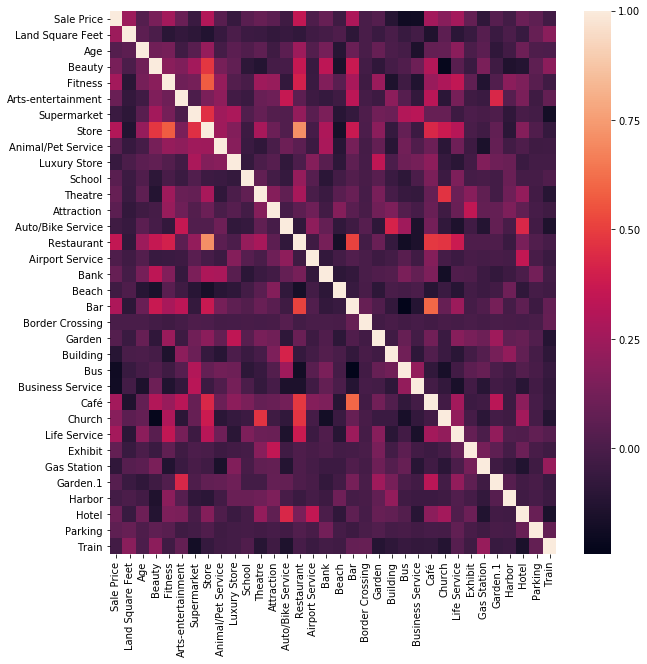

In [895]:
plt.figure(figsize=(10,10))
sns.heatmap(nyc_cleaned.corr())

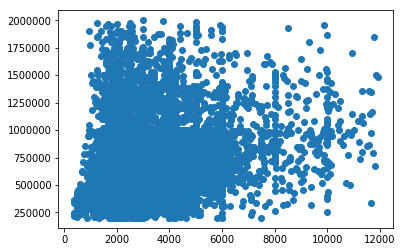

In [513]:
#scatter plot Land square feet/Sale price
import matplotlib.pyplot as plt
x = nyc_cleaned['Land Square Feet']
y = nyc_cleaned['Sale Price']
plt.scatter(x,y)

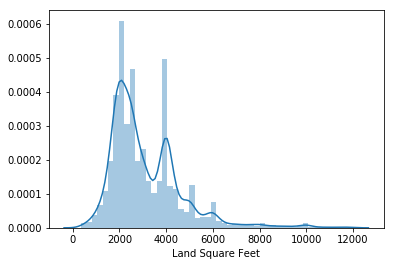

In [514]:
sns.distplot(nyc_cleaned['Land Square Feet'])

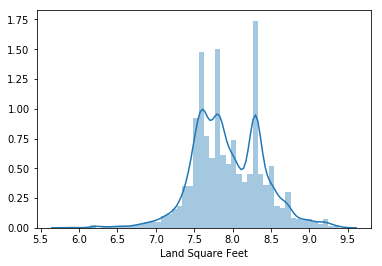

In [515]:
sns.distplot(np.log(nyc_cleaned['Land Square Feet']))

In [517]:
nyc_cleaned['Sale Price'] = np.log(nyc_cleaned['Sale Price'])

In [518]:
nyc_cleaned['Land Square Feet'] = np.log(nyc_cleaned['Land Square Feet'])

In [526]:
nyc_cleaned = nyc_cleaned.reset_index(drop=True)

Part 5. Machine Learning Models

I. Train and test splits


In [832]:
nyc_cleaned

,Borough,Neighborhood,Sale Price,Land Square Feet,Age,Beauty,Fitness,Arts-entertainment,Supermarket,Store,...,Café,Church,Life Service,Exhibit,Gas Station,Garden.1,Harbor,Hotel,Parking,Train
0,Brooklyn,Bath Beach,12.206073,7.477038,89,2,2,0,2,31,...,3,0,0,0,0,0,0,0,0,0
1,Brooklyn,Bath Beach,12.644328,7.717796,89,2,2,0,2,31,...,3,0,0,0,0,0,0,0,0,0
2,Brooklyn,Bath Beach,13.122363,7.377759,79,2,2,0,2,31,...,3,0,0,0,0,0,0,0,0,0
3,Brooklyn,Bath Beach,13.365310,7.749322,89,2,2,0,2,31,...,3,0,0,0,0,0,0,0,0,0
4,Brooklyn,Bath Beach,13.429848,7.407924,79,2,2,0,2,31,...,3,0,0,0,0,0,0,0,0,0
5,Brooklyn,Bath Beach,13.429848,7.389564,79,2,2,0,2,31,...,3,0,0,0,0,0,0,0,0,0
6,Brooklyn,Bath Beach,13.500800,7.484369,74,2,2,0,2,31,...,3,0,0,0,0,0,0,0,0,0
7,Brooklyn,Bath Beach,13.534473,7.367709,69,2,2,0,2,31,...,3,0,0,0,0,0,0,0,0,0
8,Brooklyn,Bath Beach,13.547631,7.436028,69,2,2,0,2,31,...,3,0,0,0,0,0,0,0,0,0
9,Brooklyn,Bath Beach,13.554146,7.320527,69,2,2,0,2,31,...,3,0,0,0,0,0,0,0,0,0


In [863]:
nyc = nyc_cleaned.drop(['Borough','Neighborhood'],axis=1)

In [864]:
y = nyc['Sale Price']
x = nyc.drop('Sale Price',axis=1)

In [865]:
#Split x and y
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)


In [866]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(9588, 33) (2397, 33) (9588,) (2397,)


II.Data Standardization
We need to scale all features to between 0 and 1. Here we apply data standardization ---- zero mean centring and unit scaling.


In [867]:
train_mean = x_train.mean()
train_std = x_train.std()

In [868]:
x_train = (x_train - train_mean)/train_std


In [869]:
x_train.reset_index(drop=True)

,Land Square Feet,Age,Beauty,Fitness,Arts-entertainment,Supermarket,Store,Animal/Pet Service,Luxury Store,School,...,Café,Church,Life Service,Exhibit,Gas Station,Garden.1,Harbor,Hotel,Parking,Train
0,-0.873140,-0.364555,1.397803,0.180765,-0.480416,5.658879,2.286106,1.789097,2.315349,-0.215354,...,-0.147858,-0.195787,-0.509035,-0.079351,-0.492975,-0.106082,-0.182080,-0.394941,-0.068666,-0.598473
1,1.824282,0.965993,0.893906,-0.657327,-0.480416,0.055700,-0.155282,-0.500221,-0.335029,-0.215354,...,-0.147858,-0.195787,-0.509035,-0.079351,-0.492975,-0.106082,-0.182080,-0.394941,-0.068666,1.076903
2,-0.713502,1.156072,-0.113886,-0.657327,-0.480416,0.055700,0.387249,-0.500221,-0.335029,4.643033,...,1.719944,-0.195787,1.041354,-0.079351,-0.492975,-0.106082,-0.182080,-0.394941,-0.068666,-0.598473
3,1.269921,-1.200899,-0.617783,0.180765,1.459049,0.405899,-0.290914,-0.500221,-0.335029,-0.215354,...,-0.770459,-0.195787,-0.509035,-0.079351,-0.492975,-0.106082,-0.182080,-0.394941,-0.068666,-0.598473
4,-0.651469,0.395759,-0.113886,-0.657327,-0.480416,0.055700,0.387249,-0.500221,-0.335029,4.643033,...,1.719944,-0.195787,1.041354,-0.079351,-0.492975,-0.106082,-0.182080,-0.394941,-0.068666,-0.598473
5,-0.292040,-0.820742,1.397803,-0.238281,-0.480416,0.055700,-0.019649,-0.500221,-0.335029,-0.215354,...,1.097343,-0.195787,-0.509035,-0.079351,-0.492975,-0.106082,-0.182080,-0.394941,-0.068666,-0.598473
6,0.440351,-1.390977,-1.121679,-1.076373,-0.480416,-0.294499,-0.697812,-0.500221,-0.335029,-0.215354,...,-0.147858,-0.195787,-0.509035,-0.079351,-0.492975,-0.106082,-0.182080,-0.394941,-0.068666,-0.598473
7,-0.992891,0.395759,0.390010,-1.076373,1.459049,0.055700,-0.426547,-0.500221,-0.335029,-0.215354,...,1.097343,-0.195787,-0.509035,-0.079351,-0.492975,-0.106082,-0.182080,1.323940,-0.068666,-0.598473
8,-0.992891,0.319727,0.893906,3.114086,-0.480416,0.055700,2.286106,1.789097,-0.335029,-0.215354,...,1.097343,-0.195787,2.591743,-0.079351,-0.492975,-0.106082,1.288671,1.323940,-0.068666,-0.598473
9,-0.294732,1.118056,-0.617783,1.018857,-0.480416,0.055700,-0.019649,-0.500221,-0.335029,-0.215354,...,-0.770459,-0.195787,1.041354,12.600930,1.799286,-0.106082,-0.182080,1.323940,-0.068666,-0.598473


In [870]:
x_test = (x_test - train_mean)/train_std


In [871]:
x_test.reset_index(drop=True)

,Land Square Feet,Age,Beauty,Fitness,Arts-entertainment,Supermarket,Store,Animal/Pet Service,Luxury Store,School,...,Café,Church,Life Service,Exhibit,Gas Station,Garden.1,Harbor,Hotel,Parking,Train
0,0.024908,-0.934789,-1.121679,0.599811,-0.480416,-0.644697,-1.511608,-0.500221,-0.335029,-0.215354,...,-0.770459,-0.195787,-0.509035,-0.079351,-0.492975,-0.106082,2.759422,-0.394941,-0.068666,-0.598473
1,0.935870,-1.505024,-1.121679,-0.238281,-0.480416,-0.644697,-1.647241,-0.500221,-0.335029,4.643033,...,-0.770459,-0.195787,-0.509035,-0.079351,-0.492975,-0.106082,-0.182080,-0.394941,-0.068666,2.752279
2,-0.992891,0.015602,-1.121679,-0.657327,-0.480416,-0.644697,-0.969077,-0.500221,-0.335029,-0.215354,...,0.474743,-0.195787,-0.509035,-0.079351,-0.492975,-0.106082,-0.182080,-0.394941,-0.068666,-0.598473
3,0.775690,-1.695102,-0.113886,-1.076373,-0.480416,-0.644697,-0.697812,-0.500221,2.315349,-0.215354,...,-0.770459,-0.195787,-0.509035,-0.079351,1.799286,-0.106082,-0.182080,-0.394941,-0.068666,1.076903
4,1.085243,0.395759,0.390010,-0.657327,-0.480416,-0.294499,-0.290914,-0.500221,-0.335029,-0.215354,...,-0.770459,-0.195787,-0.509035,-0.079351,1.799286,-0.106082,-0.182080,-0.394941,-0.068666,-0.598473
5,0.281459,0.775915,0.893906,1.018857,-0.480416,0.405899,1.472310,-0.500221,2.315349,-0.215354,...,1.719944,-0.195787,-0.509035,-0.079351,1.799286,-0.106082,-0.182080,-0.394941,-0.068666,-0.598473
6,-0.651469,-1.695102,-0.617783,-1.076373,1.459049,-0.644697,-0.426547,1.789097,-0.335029,-0.215354,...,-0.770459,-0.195787,-0.509035,-0.079351,-0.492975,-0.106082,-0.182080,1.323940,-0.068666,-0.598473
7,0.063428,1.156072,-0.113886,0.599811,1.459049,0.405899,0.251616,-0.500221,-0.335029,-0.215354,...,-0.770459,-0.195787,2.591743,-0.079351,-0.492975,-0.106082,-0.182080,-0.394941,-0.068666,-0.598473
8,0.775690,0.015602,-1.121679,0.599811,-0.480416,-0.644697,-1.511608,-0.500221,-0.335029,-0.215354,...,-0.770459,-0.195787,-0.509035,-0.079351,-0.492975,-0.106082,2.759422,-0.394941,-0.068666,-0.598473
9,1.269921,0.395759,1.397803,0.180765,-0.480416,5.658879,2.286106,1.789097,2.315349,-0.215354,...,-0.147858,-0.195787,-0.509035,-0.079351,-0.492975,-0.106082,-0.182080,-0.394941,-0.068666,-0.598473


In [872]:
x_test.shape

(2397, 33)

In [ ]:
#Contribution:

#Due to time limited, or we could add more detailed factors, like crime\
#rate, number of middle schools, even in a block level.

#So, when one client tells us his requirements for the house, i.e. more\
#restaurant, more beauty&spas, or more schools,and tell us his ideal\
#boroughs, we may give a general interval the house price may fall in.

#Or when one client would like to sell one house, we can predict the \
#probable selling price by evaluting the house's features, which would\
#help save time and improve efficiency.

In [875]:
# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import Ridge  # Linear Regression + L2 regularization
from sklearn.linear_model import Lasso  # Linear Regression + L1 regularization
from sklearn.svm import SVR # Support Vector Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor

# Evaluation Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rs
from sklearn.metrics import mean_absolute_error as mae

#import xgboost

from xgboost import XGBRegressor
from xgboost import plot_importance  # to plot feature importance

# to save the final model on disk
from sklearn.externals import joblib

In [625]:

#PPT: 这几个解释维度的公式

In [876]:
print("Train Results for Baseline Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mean_squared_error(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_train, y_train_pred))


Train Results for Baseline Model:
*******************************
Root mean squared error:  0.4115572061086157
R-squared:  1.1102230246251565e-16
Mean Absolute Error:  0.3246721141261954


In [890]:
#Model 1 Linear Regression

from sklearn.linear_model import LinearRegression as lm

model = lm().fit(x_train, y_train)


In [878]:
y_hat = model.predict(x_test)


In [879]:
#Take this on PPT
print("Test Results for OLS:")
print("*******************************")
print("Mean squared error: ", mse(y_test, y_hat))
print("R-squared: ", r2_score(y_test,y_hat))
print("Mean Absolute Error: ", mae(y_test, y_hat))

Test Results for OLS:
*******************************
Mean squared error:  0.11127441028313705
R-squared:  0.3629130660352432
Mean Absolute Error:  0.2532288838629949


In [880]:
print('Max positive coef: ', lm.coef_[np.argsort(-lm.coef_)[:10]])
print('Venue category with the max positive coef: ', x.columns[np.argsort(lm.coef_)[:10]].values)

coef_abs = abs(lm.coef_)

print('Min coefs:', lm.coef_[np.argsort(coef_abs)[:10]])
print('Venue category with the min abs coef: ', x.columns[np.argsort(coef_abs)[:10]].values)


Max positive coef:  [0.1315951  0.08594401 0.05829703 0.04060726 0.03760826 0.03295748
 0.03153327 0.03142611 0.03018622 0.0169554 ]
Venue category with the max positive coef:  ['Age' 'Bus' 'Business Service' 'Train' 'Building' 'Garden.1'
 'Gas Station' 'Animal/Pet Service' 'Supermarket' 'Theatre']
Min coefs: [-6.40122902e-05  1.80362107e-03 -2.59345406e-03 -2.70345923e-03
 -2.93683169e-03 -4.89305504e-03  6.26967149e-03  7.04897360e-03
  8.11660839e-03  8.79370140e-03]
Venue category with the min abs coef:  ['Church' 'Attraction' 'Hotel' 'Garden' 'Border Crossing' 'Harbor' 'Beach'
 'Parking' 'Auto/Bike Service' 'School']


In [ ]:
#The result has some problems:
#The R2 score could be improved; There maybe correlations between features


#PCR (Principal Component Regression) to reduce dimensions of features
PCR is a regression technique which is based on PCA (Principle Component Analysis).
It's a two steps process:

First, perform PCA on the features set to obtain the principle components. Then select a subset for the next step.
Second, use regression on the previous subset of principal components to get a list of coefficient correlations. (Linear Regression will be used)

In [881]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='auto', random_state=0)
x_pca = pca.fit_transform(scale(x))


/Users/sfdatabro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


In [882]:
n_component = range(1,34)
r2_list=[]
mse_list=[]

#Second step, linear regression
for i in n_component:
    lm = LinearRegression()
    x_train,x_test,y_train,y_test = train_test_split(x_pca[:,:i],y,test_size=0.2)
    model=lm.fit(x_train, y_train)
    
    y_pred = lm.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    r2_list.append(r2)
    mse_list.append(mse)
    
scores_df = pd.DataFrame.from_dict(dict([('NComponents', n_component),
                                        ('R2', r2_list),
                                        ('MSE', mse_list)]))
scores_df.set_index('NComponents', inplace=True)
    

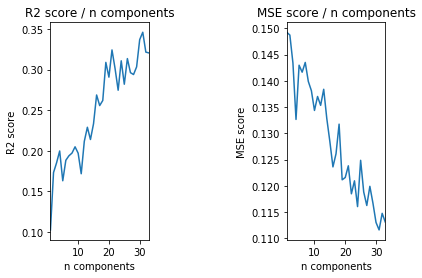

In [883]:
# plot the scores to see the best n_components
plt.subplot(1, 3, 1)
scores_df['R2'].plot(kind='line')
plt.title('R2 score / n components')
plt.ylabel('R2 score')
plt.xlabel('n components')

plt.subplot(1, 3, 3)
scores_df['MSE'].plot(kind='line')
plt.title('MSE score / n components')
plt.ylabel('MSE score')
plt.xlabel('n components')

plt.show()

In [884]:
r2_max = scores_df['R2'].idxmax()
print("Best n:", r2_max, "R2 score:", scores_df['R2'][r2_max])

mse_min = scores_df['MSE'].idxmin()
print("Best n:", mse_min, "MSE:", scores_df['MSE'][mse_min])

Best n: 31 R2 score: 0.3458666388877616
Best n: 31 MSE: 0.11159512420465162


In [892]:
# Let's try to project the coefs back to the original number of features
lm = LinearRegression()
eigenvectors = pca.components_
pcr_coefs = eigenvectors[:r2_max, :].T @ lm.coef_

pcr_coefs.shape

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [887]:
# Let's check which venue types effect the most and least
print('Max positive coefs:', pcr_coefs[np.argsort(-pcr_coefs)[:10]])
print('Venue types with most positive effect:', x.columns[np.argsort(-pcr_coefs)[:10]].values)
print('Max negative coefs:', pcr_coefs[np.argsort(pcr_coefs)[:10]])
print('Venue types with most negative effect:', x.columns[np.argsort(pcr_coefs)[:10]].values)
coef_abs = abs(pcr_coefs)
print('Min coefs:', pcr_coefs[np.argsort(coef_abs)[:10]])
print('Venue types with least effect:', x.columns[np.argsort(coef_abs)[:10]].values)

Max positive coefs: [0.1325614  0.08590487 0.05792463 0.03978976 0.0382455  0.0331122
 0.03141508 0.03114103 0.02997373 0.01688204]
Venue types with most positive effect: ['Land Square Feet' 'Store' 'Life Service' 'Exhibit' 'Bar' 'Restaurant'
 'Bank' 'Arts-entertainment' 'Café' 'Fitness']
Max negative coefs: [-0.05081795 -0.04657528 -0.04514757 -0.04003545 -0.0354542  -0.02781132
 -0.0265386  -0.02418764 -0.01929789 -0.01738762]
Venue types with most negative effect: ['Age' 'Bus' 'Business Service' 'Train' 'Building' 'Gas Station'
 'Garden.1' 'Animal/Pet Service' 'Supermarket' 'Theatre']
Min coefs: [-6.54166904e-05  1.69494788e-03 -2.63788216e-03 -2.67439754e-03
 -2.87740566e-03 -4.82416936e-03  6.17134461e-03  7.09521804e-03
  8.09819085e-03  8.76754820e-03]
Venue types with least effect: ['Church' 'Attraction' 'Hotel' 'Garden' 'Border Crossing' 'Harbor' 'Beach'
 'Parking' 'Auto/Bike Service' 'School']


In [798]:
#Model 2 Ridge Regression


tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,100000]}
model_rg = GridSearchCV(Ridge(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model_rg.fit(x_train, y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [799]:
model_rg.best_estimator_

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [800]:
y_pred = model_rg.predict(x_test)

In [801]:
print("Test Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Ridge Regression:
*******************************
Root mean squared error:  0.3335781923458431
R-squared:  0.3629130653162327
Mean Absolute Error:  0.25322888407169153


Feature Importance

In [633]:
# Building the model again with the best hyperparameters
model = Ridge(alpha=0.0001)
model.fit(x_train, y_train)

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [634]:
indices = np.argsort(-abs(model.coef_))
print("The features in order of importance are:")
print(50*'-')
for feature in x.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Land Square Feet
Store
Life Service
Age
Bus
Business Service
Exhibit
Train
Bar
Building
Restaurant
Arts-entertainment
Bank
Café
Garden.1
Gas Station
Animal/Pet Service
Supermarket
Theatre
Fitness
Beauty
Airport Service
Luxury Store
School
Auto/Bike Service
Parking
Beach
Harbor
Border Crossing
Garden
Hotel
Attraction
Church


In [702]:
#Model 3 Random Forest Regression

tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
model = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=0)

In [703]:
model.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [821]:
y_hat = model.predict(x_train)

y_pred = model.predict(x_test)

In [822]:
print("Train Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train, y_hat)))
print("R-squared: ", r2_score(y_hat, y_train))
print("Mean Absolute Error: ", mae(y_train, y_hat))


Train Results for Random Forest Regression:
*******************************
Root mean squared error:  0.3379878807042273
R-squared:  -1.0716086722585985
Mean Absolute Error:  0.2559263865348082


In [716]:
print("Test Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Random Forest Regression:
*******************************
Root mean squared error:  0.5414396431247483
R-squared:  -0.6784310240597402
Mean Absolute Error:  0.4334940824626665


In [717]:
## Building the model again with the best hyperparameters
model = RandomForestRegressor(n_estimators=400, min_samples_split=10, min_samples_leaf=4)
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [718]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in x.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Bank
Attraction
Beach
Border Crossing
School
Theatre
Building
Animal/Pet Service
Airport Service
Business Service
Bar
Supermarket
Garden
Train
Luxury Store
Gas Station
Restaurant
Arts-entertainment
Exhibit
Beauty
Life Service
Garden.1
Hotel
Church
Parking
Age
Land Square Feet
Harbor
Store
Fitness
Auto/Bike Service
Bus
Café


In [ ]:
#Model 4 XGBoost Regression

In [719]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1, 0.5], 'n_estimators': [100, 200, 300, 400, 500,600,700,800,900,1000], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(x_train, y_train)

/Users/sfdatabro/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:40:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=20, n_jobs=-1,
          param_distributions={'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=0)

In [720]:
model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=1, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [721]:
y_hat = model.predict(x_train)
y_pred = model.predict(x_test)


In [722]:
print("Train Results for XGBoost Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train, y_hat)))
print("R-squared: ", rs(y_train, y_hat))
print("Mean Absolute Error: ", mae(y_train, y_hat))

Train Results for XGBoost Regression:
*******************************
Root mean squared error:  0.40902477948470944
R-squared:  0.01226869665600494
Mean Absolute Error:  0.32290317259705


In [724]:
print("Test Results for XGBoost Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for XGBoost Regression:
*******************************
Root mean squared error:  0.41850108686134
R-squared:  -0.002759020127639067
Mean Absolute Error:  0.33143693951035297


In [725]:
## Building the model again with the best hyperparameters
model = XGBRegressor(max_depth=2,learning_rate=0.05,n_estimators=400, reg_lambda=0.001)
model.fit(X_train, y_train)

/Users/sfdatabro/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:44:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=0.001, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [726]:
## Function to include figsize parameter
## Reference: https://stackoverflow.com/questions/40081888/xgboost-plot-importance-figure-size
def my_plot_importance(booster, figsize, **kwargs): 
    from matplotlib import pyplot as plt
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)


In [732]:
x.columns

Index(['Land Square Feet', 'Age', 'Beauty', 'Fitness', 'Arts-entertainment',
       'Supermarket', 'Store', 'Animal/Pet Service', 'Luxury Store', 'School',
       'Theatre', 'Attraction', 'Auto/Bike Service', 'Restaurant',
       'Airport Service', 'Bank', 'Beach', 'Bar', 'Border Crossing', 'Garden',
       'Building', 'Bus', 'Business Service', 'Café', 'Church', 'Life Service',
       'Exhibit', 'Gas Station', 'Garden.1', 'Harbor', 'Hotel', 'Parking',
       'Train'],
      dtype='object')

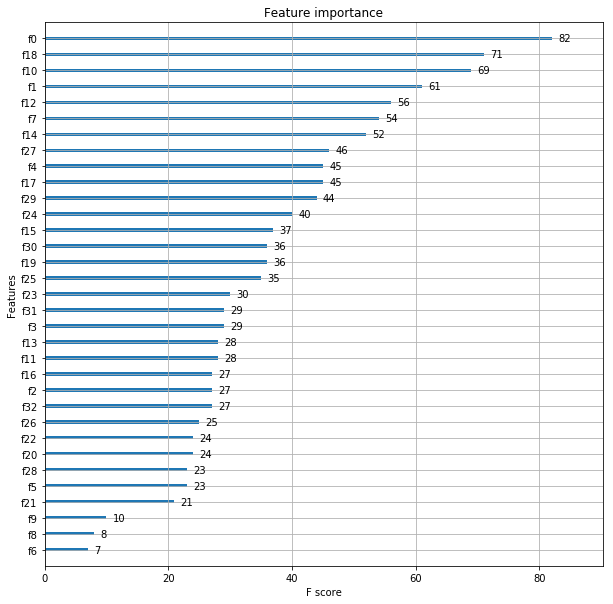

In [727]:
my_plot_importance(model, (10,10))

In [733]:
#Model 5 Lasso

tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(Lasso(), tuned_params, scoring = 'neg_mean_absolute_error', cv=20, n_jobs=-1)
model.fit(x_train, y_train)

GridSearchCV(cv=20, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [734]:
model.best_estimator_

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [735]:
y_hat = model.predict(x_train)
y_pred = model.predict(x_test)

In [737]:
print("Train Results for Lasso Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train, y_hat)))
print("R-squared: ", rs(y_train, y_hat))
print("Mean Absolute Error: ", mae(y_train, y_hat))

Train Results for Lasso Regression:
*******************************
Root mean squared error:  0.41155720610861574
R-squared:  0.0
Mean Absolute Error:  0.3246721141261957


In [738]:
print("Test Results for Lasso Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Lasso Regression:
*******************************
Root mean squared error:  0.4179422716273194
R-squared:  -8.2884184763099e-05
Mean Absolute Error:  0.33082261453319123
